In [1]:
%run imports.ipynb
%run _shared_setup.ipynb

docker image: podpearson/biipy_rdp:latest


# Plan
- First for 5 samples vcf
    - Breakdown of missingness in all input variables (ReadPosRankSum presumably very high?)
    - Histograms of VQSLOD and all input variables
    - Do different peaks in VQSLOD scores correspond to presence/lack of ReadPosRankSum?
    - Separate plots for training and other SNPs for all input variable and for VQSLOD
    - Redo VQSR without ReadPosRankSum - improvement in distribution of VQSLOD scores?
- Then for comparison of 5 samples and interim 5
    - Create scatter plots of VQSLOD and input metrics of Release 4 vs Interim 5
- Then all the above for release 4 and interim 5

- Breakdowns of NEGATIVE_TRAIN_SITE and POSITIVE_TRAIN_SITE
- Histograms of inputs by >VQSLOD in r4 or i5


# Setup

In [2]:
plot_dir = '/home/Documents/projects/Pf3k_techbm/slides/20160125_pf3k_callset_decision'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [3]:
input_variables = ['VQSLOD', 'QD', 'MQ', 'MQRankSum', 'ReadPosRankSum', 'FS', 'SOR', 'DP']

In [4]:
crosses_variants = collections.OrderedDict()
for cross in CROSSES_TRAINING_FNS:
    crosses_variants[cross] = np.load(CROSSES_TRAINING_FNS[cross])['variants'][['CHROM', 'POS']]
    print(cross, crosses_variants[cross].size)
training_variants = np.unique(
    np.concatenate(
        (
            crosses_variants['hb3_dd2'],
            crosses_variants['3d7_hb3'],
            crosses_variants['7g8_gb4']
        )
    )
)
print(training_variants.size)
# temp2 = np.in1d(temp['variants'][['CHROM', 'POS']]

hb3_dd2 36911
3d7_hb3 42244
7g8_gb4 34775
78458


In [5]:
training_variants

array([(b'Pf3D7_01_v3', 93157), (b'Pf3D7_01_v3', 93901),
       (b'Pf3D7_01_v3', 94257), ..., (b'Pf3D7_14_v3', 3254178),
       (b'Pf3D7_14_v3', 3254381), (b'Pf3D7_14_v3', 3255527)], 
      dtype=[('CHROM', 'S12'), ('POS', '<i4')])

# Single vcf analysis

In [6]:
variants = np.load(SITES_NPY_FNS['release4_5validation'])
# variants = h5py.File(SITES_H5_FNS['release4_5validation'], mode='r')['variants']
snps = variants[variants['is_snp'][...]]
indels = variants[np.logical_not(variants['is_snp'][...])]
print('indels = %d, snps = %d' % (np.count_nonzero(indels), np.count_nonzero(snps)))

indels = 102296, snps = 147268


In [73]:
temp2 = np.in1d(variants[['CHROM', 'POS']], temp['variants'][['CHROM', 'POS']])

In [74]:
np.unique(temp2, return_counts=True)

(array([False,  True], dtype=bool), array([226535,  23029]))

In [9]:
variants['is_snp'][...]

array([ True, False,  True, ...,  True,  True,  True], dtype=bool)

In [7]:
list(variants.keys())

['AC',
 'AF',
 'ALT',
 'AN',
 'BaseQRankSum',
 'CHROM',
 'ClippingRankSum',
 'DP',
 'DS',
 'END',
 'FILTER_Centromere',
 'FILTER_InternalHypervariable',
 'FILTER_LowQual',
 'FILTER_Low_VQSLOD',
 'FILTER_PASS',
 'FILTER_SubtelomericHypervariable',
 'FILTER_SubtelomericRepeat',
 'FILTER_VQSRTrancheINDEL99.00to99.90',
 'FILTER_VQSRTrancheINDEL99.90to100.00',
 'FILTER_VQSRTrancheINDEL99.90to100.00+',
 'FILTER_VQSRTrancheSNP99.90to100.00',
 'FILTER_VQSRTrancheSNP99.90to100.00+',
 'FS',
 'HaplotypeScore',
 'ID',
 'InbreedingCoeff',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQRankSum',
 'NEGATIVE_TRAIN_SITE',
 'POS',
 'POSITIVE_TRAIN_SITE',
 'QD',
 'QUAL',
 'REF',
 'ReadPosRankSum',
 'RegionType',
 'SNPEFF_AMINO_ACID_CHANGE',
 'SNPEFF_CODON_CHANGE',
 'SNPEFF_EFFECT',
 'SNPEFF_EXON_ID',
 'SNPEFF_FUNCTIONAL_CLASS',
 'SNPEFF_GENE_BIOTYPE',
 'SNPEFF_GENE_NAME',
 'SNPEFF_IMPACT',
 'SNPEFF_TRANSCRIPT_ID',
 'SOR',
 'VQSLOD',
 'VariantType',
 'culprit',
 'is_snp',
 'num_alleles',
 'set',
 'svlen']

In [40]:
variants.dtype.names

('CHROM',
 'POS',
 'ID',
 'REF',
 'ALT',
 'QUAL',
 'FILTER_Centromere',
 'FILTER_InternalHypervariable',
 'FILTER_LowQual',
 'FILTER_Low_VQSLOD',
 'FILTER_PASS',
 'FILTER_SubtelomericHypervariable',
 'FILTER_SubtelomericRepeat',
 'FILTER_VQSRTrancheINDEL99.00to99.90',
 'FILTER_VQSRTrancheINDEL99.90to100.00',
 'FILTER_VQSRTrancheINDEL99.90to100.00+',
 'FILTER_VQSRTrancheSNP99.90to100.00',
 'FILTER_VQSRTrancheSNP99.90to100.00+',
 'num_alleles',
 'is_snp',
 'svlen',
 'AC',
 'AF',
 'AN',
 'BaseQRankSum',
 'ClippingRankSum',
 'DP',
 'DS',
 'END',
 'FS',
 'HaplotypeScore',
 'InbreedingCoeff',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQRankSum',
 'NEGATIVE_TRAIN_SITE',
 'POSITIVE_TRAIN_SITE',
 'QD',
 'ReadPosRankSum',
 'RegionType',
 'SNPEFF_AMINO_ACID_CHANGE',
 'SNPEFF_CODON_CHANGE',
 'SNPEFF_EFFECT',
 'SNPEFF_EXON_ID',
 'SNPEFF_FUNCTIONAL_CLASS',
 'SNPEFF_GENE_BIOTYPE',
 'SNPEFF_GENE_NAME',
 'SNPEFF_IMPACT',
 'SNPEFF_TRANSCRIPT_ID',
 'SOR',
 'VQSLOD',
 'VariantType',
 'culprit',
 'set')

In [76]:
for release in SITES_NPY_FNS:
    variants = np.load(SITES_NPY_FNS[release])
    num_snps = np.sum((variants['is_snp']))
    num_pass_snps = np.sum((variants['is_snp']) & (variants['FILTER_PASS']))
    num_indels = np.sum(np.logical_not(variants['is_snp']))
    num_pass_indels = np.sum(np.logical_not(variants['is_snp']) & (variants['FILTER_PASS']))
    
#     print("%20s SNPs=%d/%d (%5.2%%) indels=%d/%d (%5.2%%)" % (release, num_pass_snps, num_snps, num_pass_snps*100.0/num_snps, num_pass_indels, num_indels, num_pass_indels*100.0/num_indels))
    print("%20s SNPs=%7d/%7d (%6.2f%% PASS) indels=%7d/%7d (%6.2f%% PASS)" % (release, num_pass_snps, num_snps, num_pass_snps*100.0/num_snps, num_pass_indels, num_indels, num_pass_indels*100.0/num_indels))
    

            release3 SNPs= 944270/ 944270 (100.00%) indels=      0/      0 (   nan%)
            release4 SNPs=1301421/2049376 ( 63.50%) indels= 663126/2151500 ( 30.82%)
release4_5validation SNPs=  35677/ 147268 ( 24.23%) indels=  69027/ 102296 ( 67.48%)
            interim5 SNPs= 110487/2047602 (  5.40%) indels= 739978/2164863 ( 34.18%)


In [41]:
for release in SITES_NPY_FNS:
    if release=='release3':
        continue
# for release in ['release4_5validation']:
    print('%s all\n--------------------' % release)
    variants = np.load(SITES_NPY_FNS[release])
    snps = variants[variants['is_snp']]
    indels = variants[np.logical_not(variants['is_snp'])]
    print('snps = %d, indels = %d\n' % (np.count_nonzero(snps), np.count_nonzero(indels)))
    for input_variable in input_variables:
#         vals, counts = np.unique(variants[input_variable] == 0.0, return_counts=True)
        num_zero = np.sum(variants[input_variable] == 0.0)
        num_nonzero = np.count_nonzero(variants[input_variable])
        num_zero_snps = np.sum(snps[input_variable] == 0.0)
        num_nonzero_snps = np.count_nonzero(snps[input_variable])
        num_zero_indels = np.sum(indels[input_variable] == 0.0)
        num_nonzero_indels = np.count_nonzero(indels[input_variable])
        print('%20s: Zero = %6.2f%%, Zero SNPs = %6.2f%%, Zero indels = %6.2f%%' % (
                input_variable,
                num_zero * 100.0/(num_zero+num_nonzero),
                num_zero_snps * 100.0/(num_zero_snps+num_nonzero_snps),
                num_zero_indels * 100.0/(num_zero_indels+num_nonzero_indels),
        ))
        
    print('%s training\n--------------------' % release)
    variants = variants[np.in1d(variants[['CHROM', 'POS']], training_variants)]
    snps = variants[variants['is_snp']]
    indels = variants[np.logical_not(variants['is_snp'])]
    print('snps = %d, indels = %d\n' % (np.count_nonzero(snps), np.count_nonzero(indels)))
    for input_variable in input_variables:
#         vals, counts = np.unique(variants[input_variable] == 0.0, return_counts=True)
        num_zero = np.sum(variants[input_variable] == 0.0)
        num_nonzero = np.count_nonzero(variants[input_variable])
        num_zero_snps = np.sum(snps[input_variable] == 0.0)
        num_nonzero_snps = np.count_nonzero(snps[input_variable])
        num_zero_indels = np.sum(indels[input_variable] == 0.0)
        num_nonzero_indels = np.count_nonzero(indels[input_variable])
        print('%20s: Zero = %6.2f%%, Zero SNPs = %6.2f%%, Zero indels = %6.2f%%' % (
                input_variable,
                num_zero * 100.0/(num_zero+num_nonzero),
                num_zero_snps * 100.0/(num_zero_snps+num_nonzero_snps),
                num_zero_indels * 100.0/(num_zero_indels+num_nonzero_indels),
        ))
    print()


release4 all
--------------------
snps = 2049376, indels = 2151500

              VQSLOD: Zero =   0.00%, Zero SNPs =   0.00%, Zero indels =   0.00%
                  QD: Zero =   0.01%, Zero SNPs =   0.01%, Zero indels =   0.01%
                  MQ: Zero =   0.00%, Zero SNPs =   0.00%, Zero indels =   0.00%
           MQRankSum: Zero =  11.42%, Zero SNPs =  14.31%, Zero indels =   8.67%
      ReadPosRankSum: Zero =  11.34%, Zero SNPs =  14.27%, Zero indels =   8.55%
                  FS: Zero =  25.83%, Zero SNPs =  31.84%, Zero indels =  20.11%
                 SOR: Zero =   0.00%, Zero SNPs =   0.00%, Zero indels =   0.00%
                  DP: Zero =   0.00%, Zero SNPs =   0.00%, Zero indels =   0.00%
release4 training
--------------------
snps = 20981, indels = 52335

              VQSLOD: Zero =   0.00%, Zero SNPs =   0.00%, Zero indels =   0.00%
                  QD: Zero =   0.00%, Zero SNPs =   0.00%, Zero indels =   0.00%
                  MQ: Zero =   0.00%, Zero SNPs =   0

In [8]:
for release in SITES_NPY_FNS:
    if release=='release3':
        continue
# for release in ['release4_5validation']:
    print('%s all\n--------------------' % release)
    variants = np.load(SITES_NPY_FNS[release])
    snps = variants[variants['is_snp']]
    indels = variants[np.logical_not(variants['is_snp'])]
    print('snps = %d, indels = %d\n' % (np.count_nonzero(snps), np.count_nonzero(indels)))
    for input_variable in input_variables:
#         vals, counts = np.unique(variants[input_variable] == 0.0, return_counts=True)
        num_zero = np.sum(np.isnan(variants[input_variable]))
        num_nonzero = np.sum(np.logical_not(np.isnan(variants[input_variable])))
        num_zero_snps = np.sum(np.isnan(snps[input_variable]))
        num_nonzero_snps = np.sum(np.logical_not(np.isnan(snps[input_variable])))
        num_zero_indels = np.sum(np.isnan(indels[input_variable]))
        num_nonzero_indels = np.sum(np.logical_not(np.isnan(indels[input_variable])))
        print('%20s: Zero = %6.2f%%, Zero SNPs = %6.2f%%, Zero indels = %6.2f%%' % (
                input_variable,
                num_zero * 100.0/(num_zero+num_nonzero),
                num_zero_snps * 100.0/(num_zero_snps+num_nonzero_snps),
                num_zero_indels * 100.0/(num_zero_indels+num_nonzero_indels),
        ))
        
    print('%s training\n--------------------' % release)
    variants = variants[np.in1d(variants[['CHROM', 'POS']], training_variants)]
    snps = variants[variants['is_snp']]
    indels = variants[np.logical_not(variants['is_snp'])]
    print('snps = %d, indels = %d\n' % (np.count_nonzero(snps), np.count_nonzero(indels)))
    for input_variable in input_variables:
#         vals, counts = np.unique(variants[input_variable] == 0.0, return_counts=True)
        num_zero = np.sum(np.isnan(variants[input_variable]))
        num_nonzero = np.sum(np.logical_not(np.isnan(variants[input_variable])))
        num_zero_snps = np.sum(np.isnan(snps[input_variable]))
        num_nonzero_snps = np.sum(np.logical_not(np.isnan(snps[input_variable])))
        num_zero_indels = np.sum(np.isnan(indels[input_variable]))
        num_nonzero_indels = np.sum(np.logical_not(np.isnan(indels[input_variable])))
        print('%20s: Zero = %6.2f%%, Zero SNPs = %6.2f%%, Zero indels = %6.2f%%' % (
                input_variable,
                num_zero * 100.0/(num_zero+num_nonzero),
                num_zero_snps * 100.0/(num_zero_snps+num_nonzero_snps),
                num_zero_indels * 100.0/(num_zero_indels+num_nonzero_indels),
        ))
    print()


release4 all
--------------------
snps = 2049376, indels = 2151500

              VQSLOD: Zero =   0.00%, Zero SNPs =   0.00%, Zero indels =   0.00%
                  QD: Zero =   0.00%, Zero SNPs =   0.00%, Zero indels =   0.00%
                  MQ: Zero =   0.00%, Zero SNPs =   0.00%, Zero indels =   0.00%
           MQRankSum: Zero =   0.00%, Zero SNPs =   0.00%, Zero indels =   0.00%
      ReadPosRankSum: Zero =   0.00%, Zero SNPs =   0.00%, Zero indels =   0.00%
                  FS: Zero =   0.00%, Zero SNPs =   0.00%, Zero indels =   0.00%
                 SOR: Zero =   0.00%, Zero SNPs =   0.00%, Zero indels =   0.00%
                  DP: Zero =   0.00%, Zero SNPs =   0.00%, Zero indels =   0.00%
release4 training
--------------------
snps = 20981, indels = 52335

              VQSLOD: Zero =   0.00%, Zero SNPs =   0.00%, Zero indels =   0.00%
                  QD: Zero =   0.00%, Zero SNPs =   0.00%, Zero indels =   0.00%
                  MQ: Zero =   0.00%, Zero SNPs =   0

In [16]:
variants[input_variable][snps[...]]
# snps

array([  -7.63999987,   -6.76200008,   -6.6329999 , ..., -131.19999695,
        -71.11000061,  -58.34000015], dtype=float32)

In [111]:
for release in SITES_NPY_FNS:
    if release=='release3':
        continue
    print('%s\n--------------------' % release)
    variants = np.load(SITES_NPY_FNS[release])
    for input_variable1 in input_variables:
        for input_variable2 in input_variables:
            num_both = np.sum((variants[input_variable1] == 0.0) & (variants[input_variable2] == 0.0))
            num_1 = np.sum((variants[input_variable1] == 0.0) & (variants[input_variable2] != 0.0))
            num_2 = np.sum((variants[input_variable1] != 0.0) & (variants[input_variable2] == 0.0))
            num_neither = np.sum((variants[input_variable1] != 0.0) & (variants[input_variable2] != 0.0))
            print('%15s, %15s: Both = %6.2f%%, 1 = %6.2f%%, 2 = %6.2f%%, Neither = %6.2f%%, total=%d' % (
                input_variable1,
                input_variable2,
                num_both * 100.0/(num_both+num_1+num_2+num_neither),
                num_1 * 100.0/(num_both+num_1+num_2+num_neither),
                num_2 * 100.0/(num_both+num_1+num_2+num_neither),
                num_neither * 100.0/(num_both+num_1+num_2+num_neither),
                num_both+num_1+num_2+num_neither
            ))


release4
--------------------
         VQSLOD,          VQSLOD: Both =   0.00%, 1 =   0.00%, 2 =   0.00%, Neither = 100.00%, total=4200876
         VQSLOD,              QD: Both =   0.00%, 1 =   0.00%, 2 =   0.01%, Neither =  99.99%, total=4200876
         VQSLOD,              MQ: Both =   0.00%, 1 =   0.00%, 2 =   0.00%, Neither = 100.00%, total=4200876
         VQSLOD,       MQRankSum: Both =   0.00%, 1 =   0.00%, 2 =  11.42%, Neither =  88.58%, total=4200876
         VQSLOD,  ReadPosRankSum: Both =   0.00%, 1 =   0.00%, 2 =  11.34%, Neither =  88.66%, total=4200876
         VQSLOD,              FS: Both =   0.00%, 1 =   0.00%, 2 =  25.83%, Neither =  74.17%, total=4200876
         VQSLOD,             SOR: Both =   0.00%, 1 =   0.00%, 2 =   0.00%, Neither = 100.00%, total=4200876
         VQSLOD,              DP: Both =   0.00%, 1 =   0.00%, 2 =   0.00%, Neither = 100.00%, total=4200876
             QD,          VQSLOD: Both =   0.00%, 1 =   0.01%, 2 =   0.00%, Neither =  99.99%, tot

In [10]:
# input_variables = ['VQSLOD', 'QD', 'MQ', 'MQRankSum', 'ReadPosRankSum', 'FS', 'SOR', 'DP']
xlims = collections.OrderedDict()
xlims['VQSLOD'] = (-30, 20)
xlims['QD'] = (0, 40)
xlims['MQ'] = (20, 70)
xlims['MQRankSum'] = (-5, 5)
xlims['ReadPosRankSum'] = (-5, 5)
xlims['FS'] = (0, 100)
xlims['SOR'] = (0, 10)
xlims['DP'] = {'release4':(0, 500000), 'release4_5validation':(0, 1000), 'interim5':(0, 500000)}

release4
--------------------
release4_5validation
--------------------
interim5
--------------------


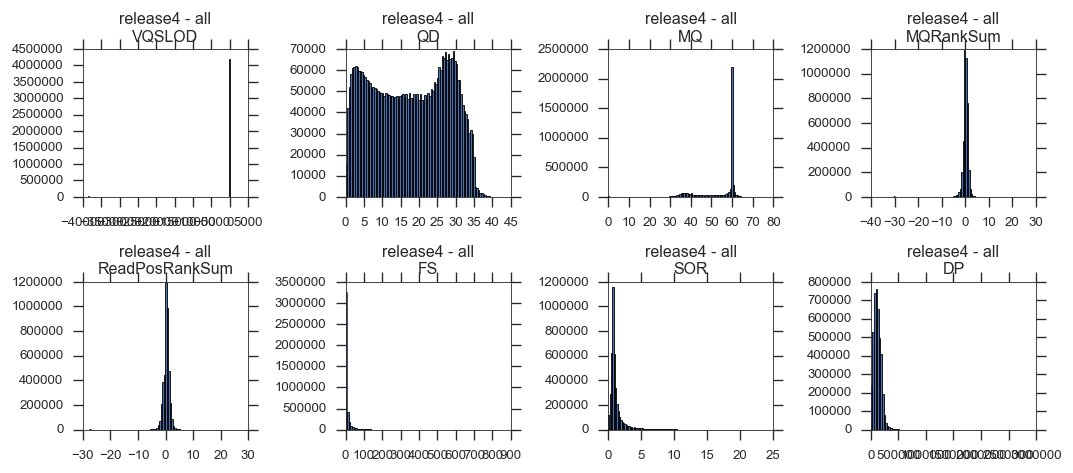

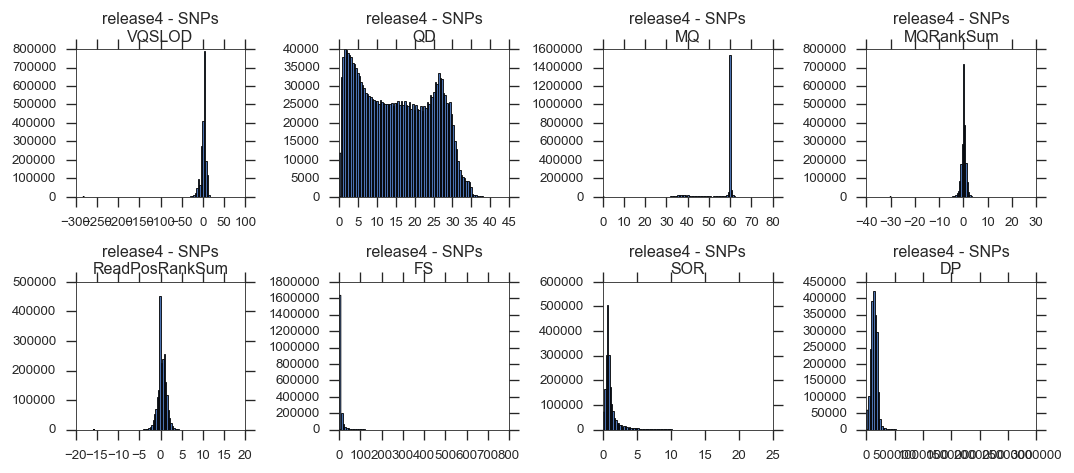

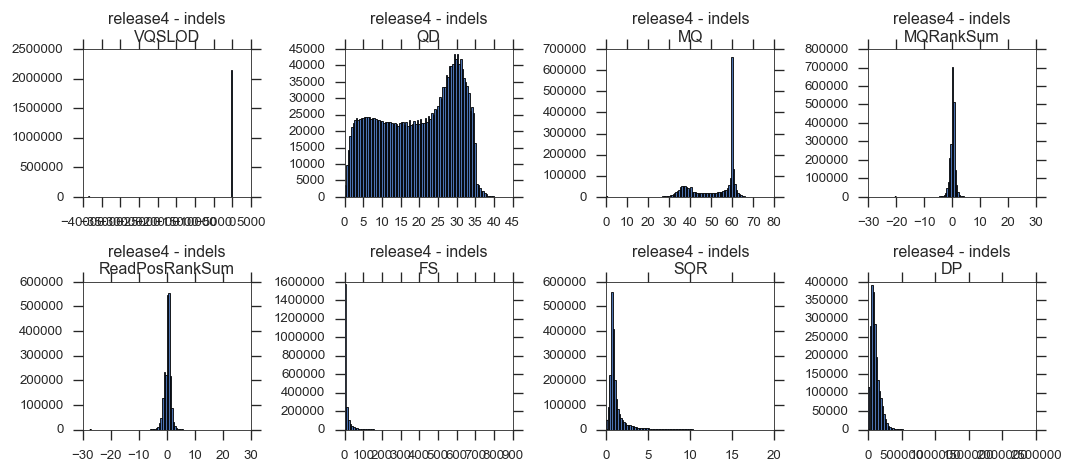

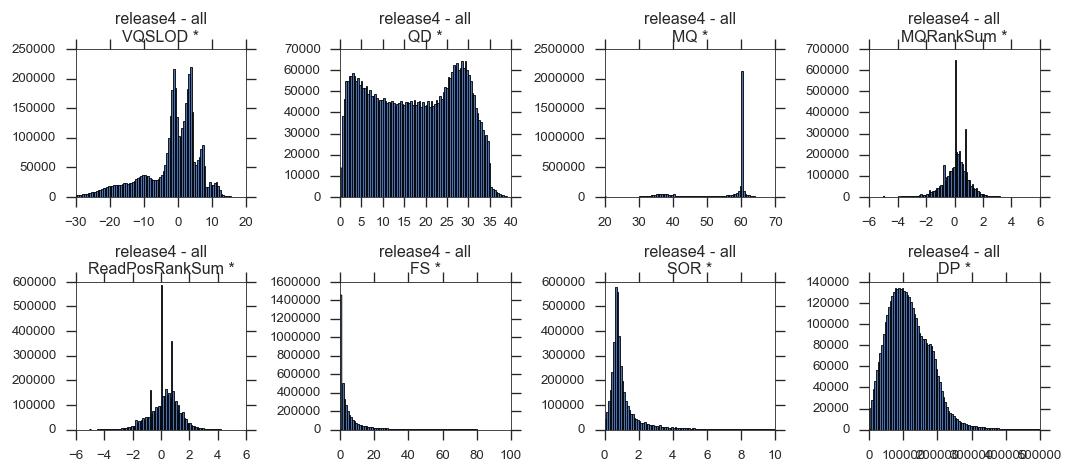

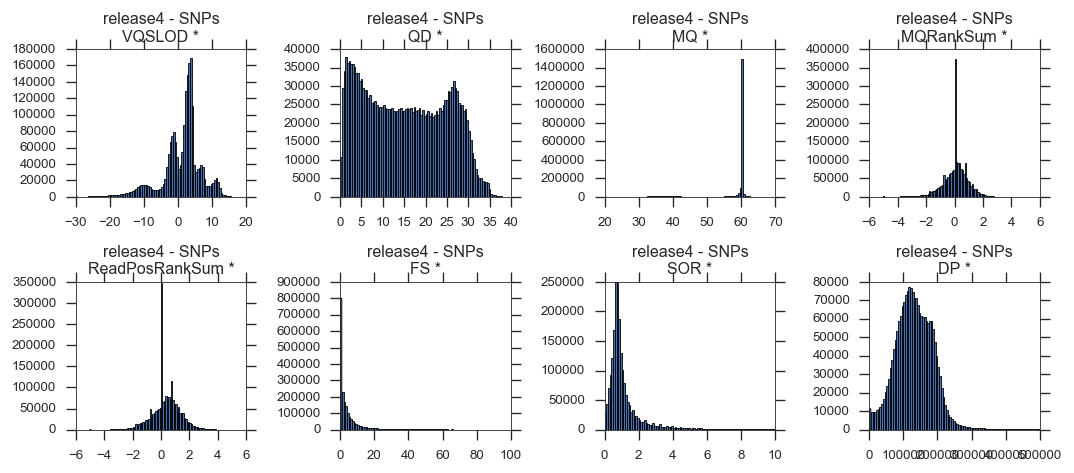

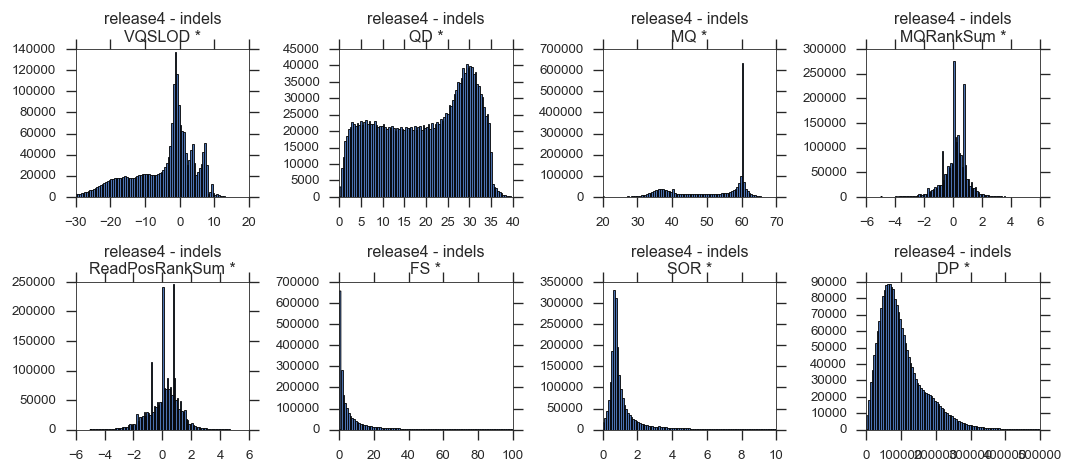

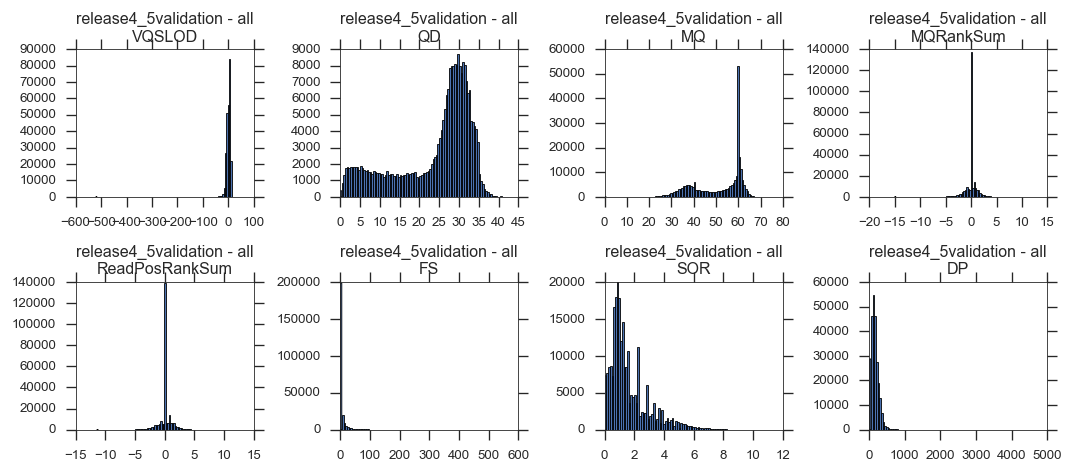

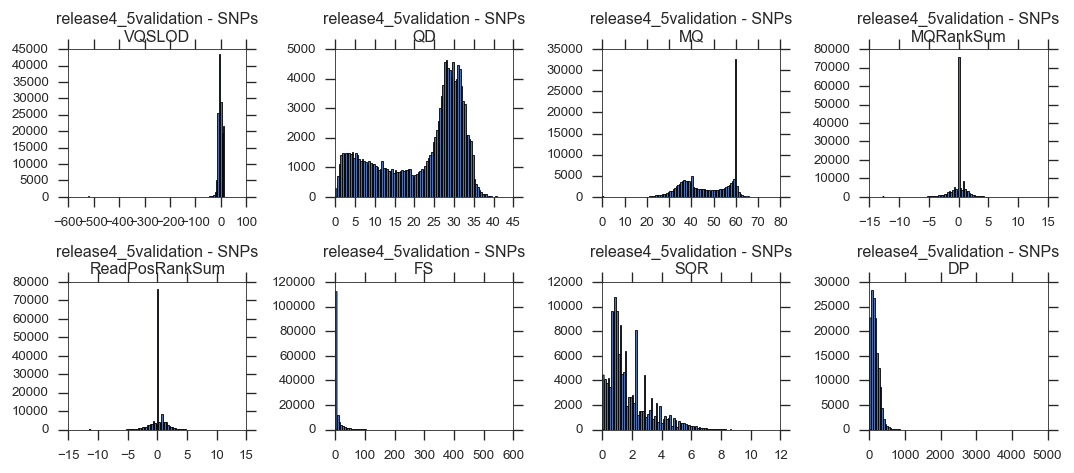

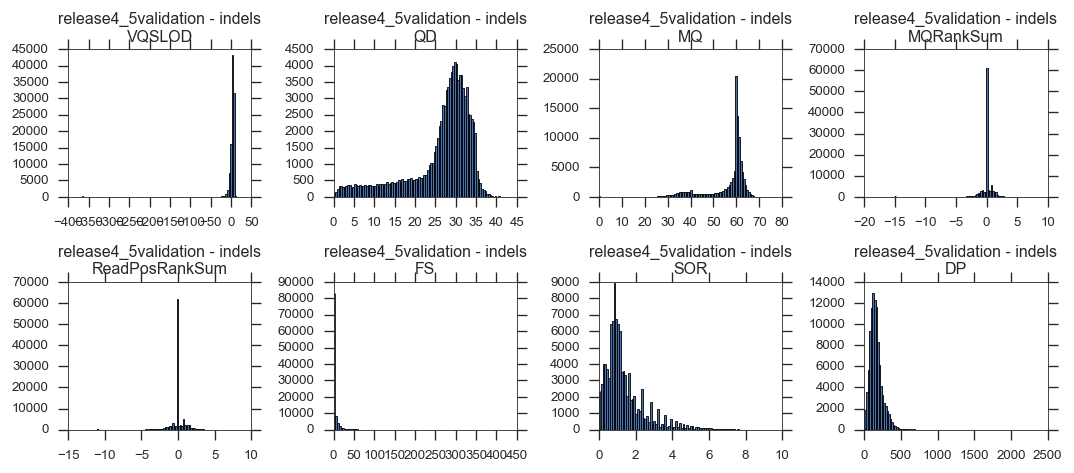

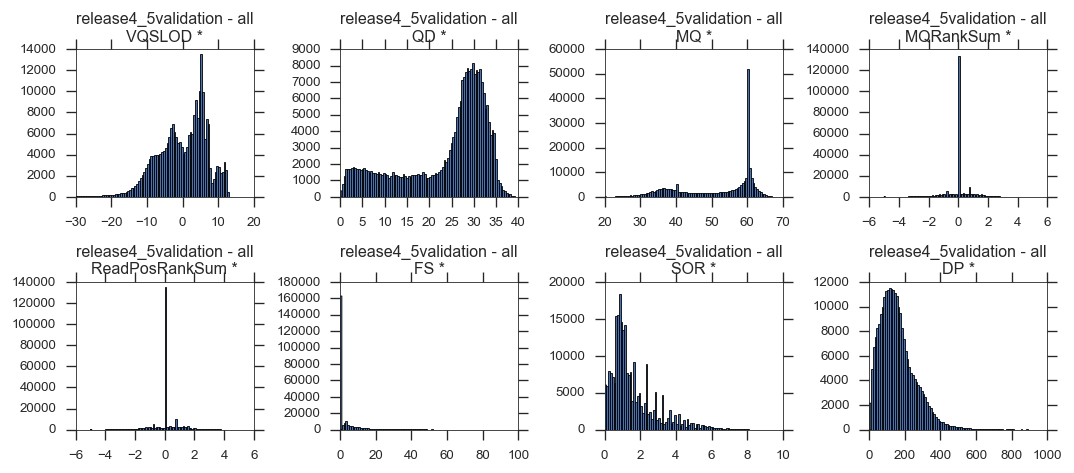

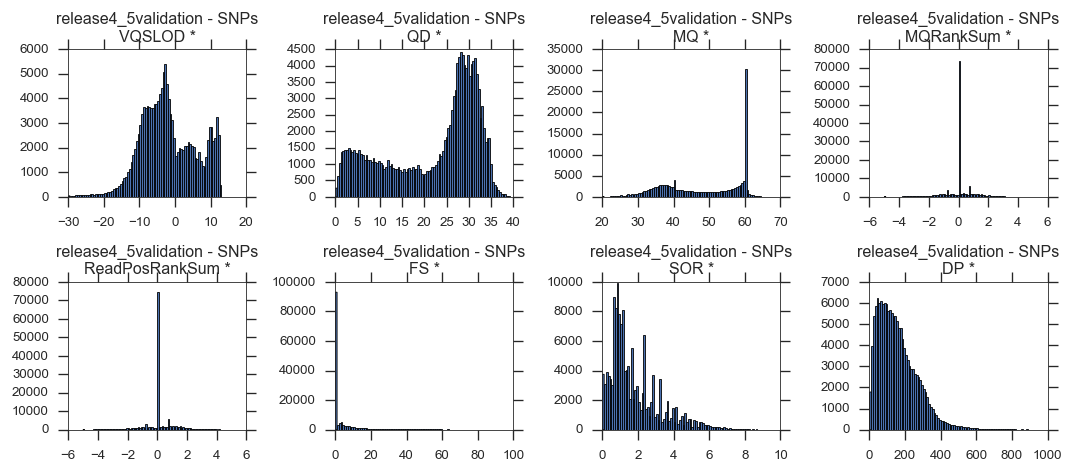

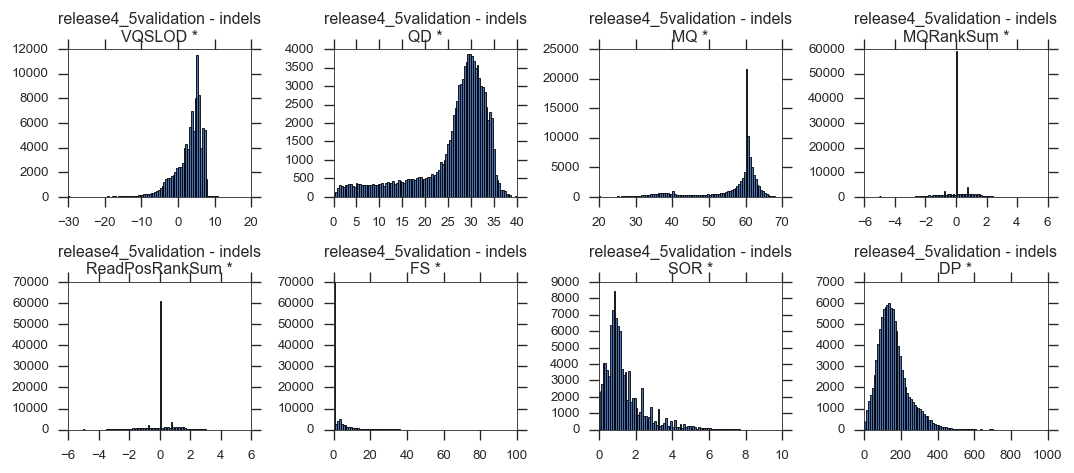

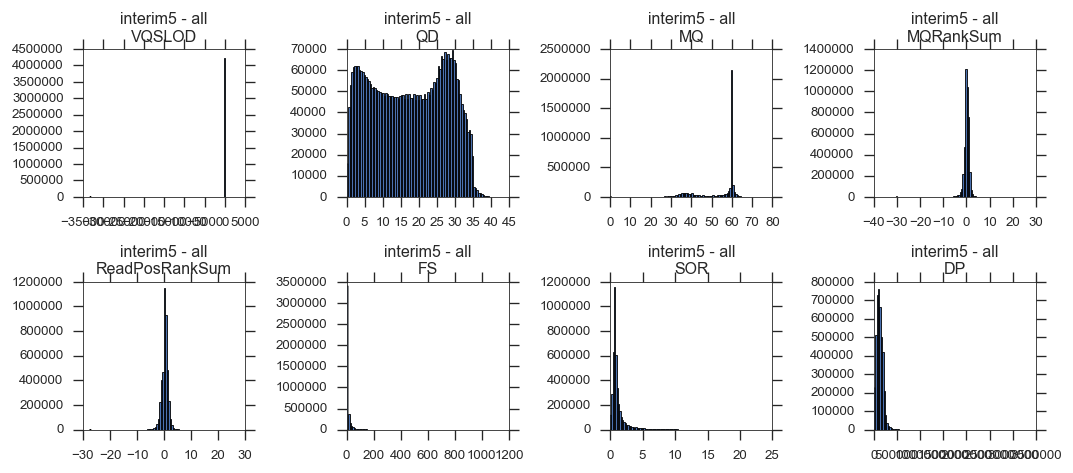

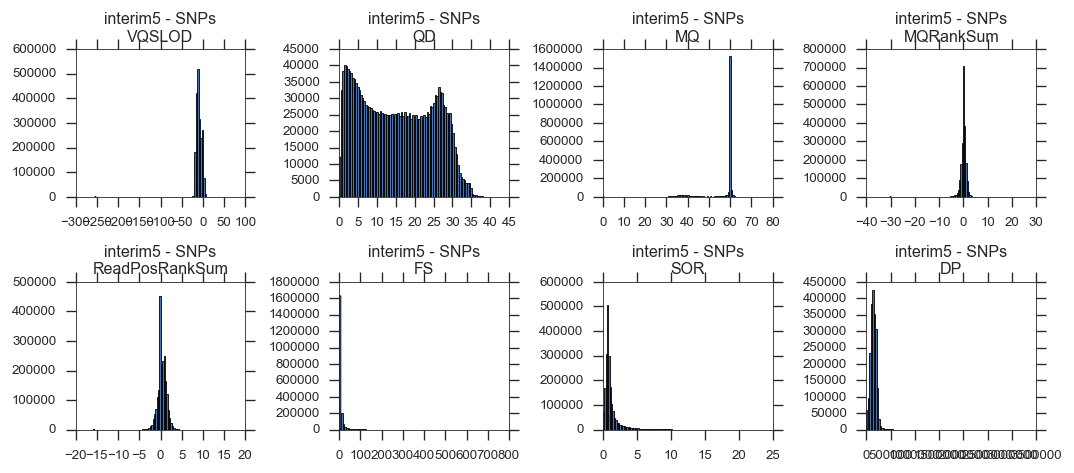

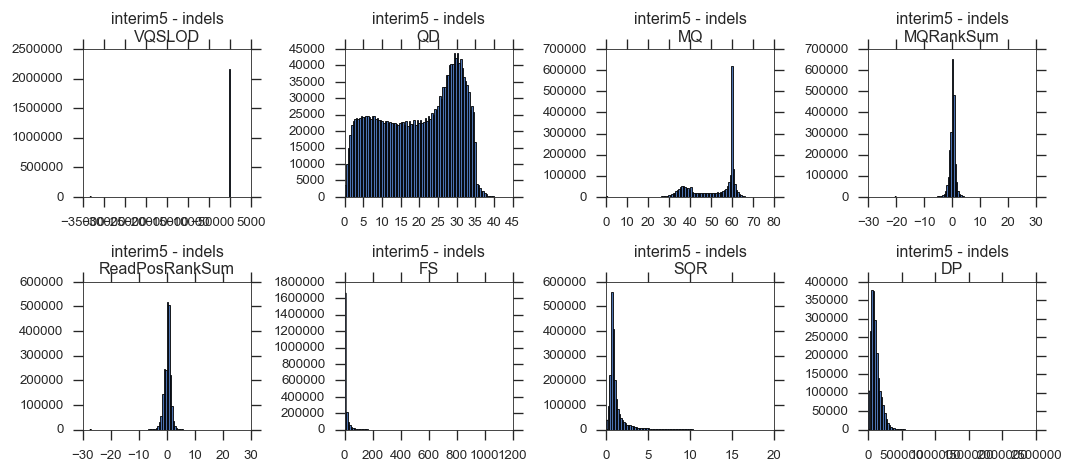

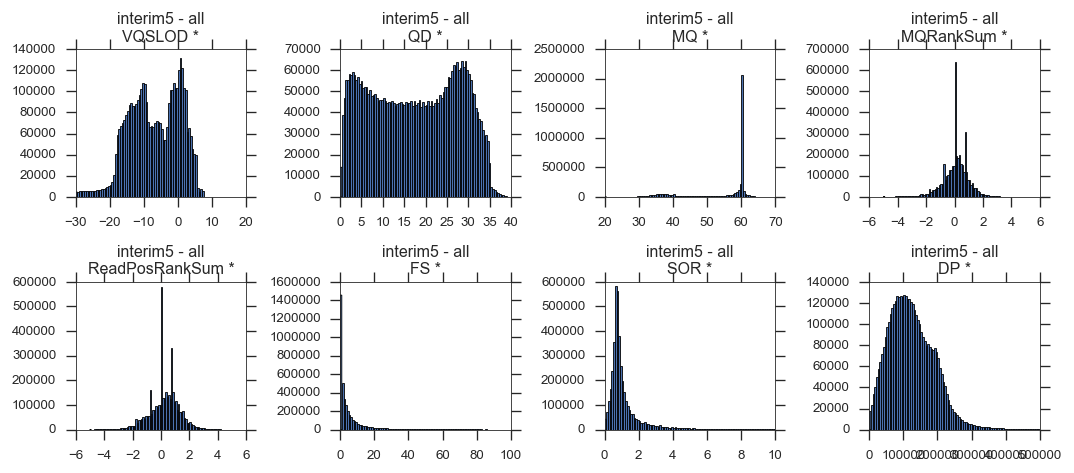

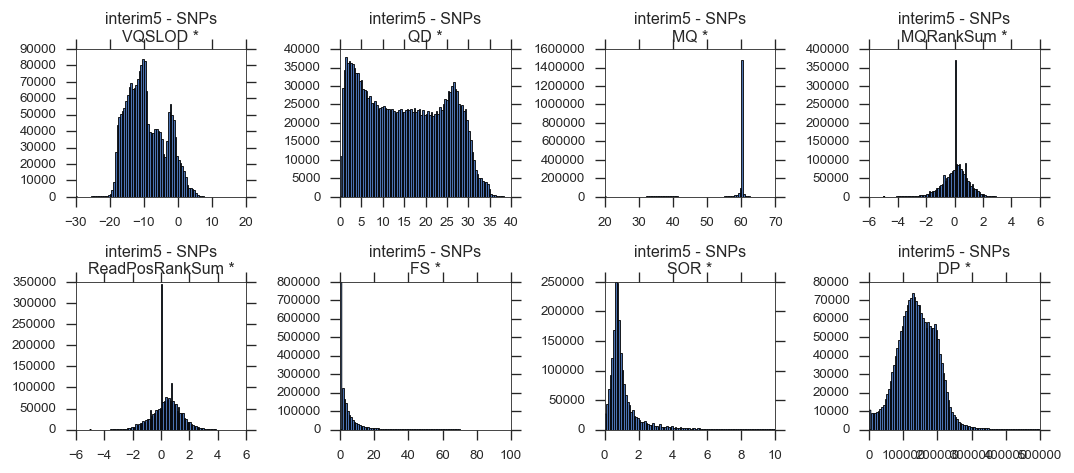

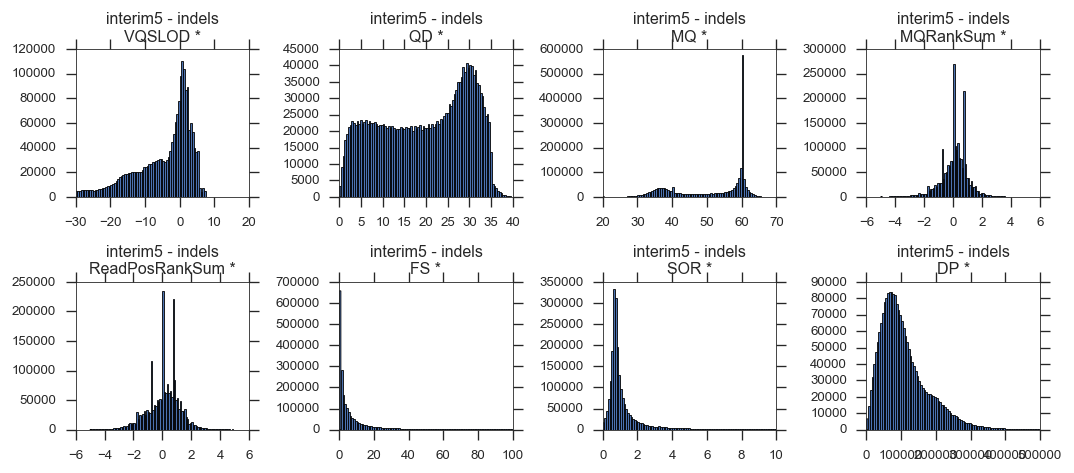

In [37]:
for release in SITES_NPY_FNS:
# for release in ['release4_5validation']:
    if release=='release3':
        continue
    print('%s\n--------------------' % release)
    variants = np.load(SITES_NPY_FNS[release])
    
    fig = plt.figure(figsize=(9, 4))
    for i, input_variable in enumerate(input_variables):
        ax = fig.add_subplot(2, 4, i+1)
        ax.hist(variants[input_variable], bins=100)
        ax.set_title("%s - all\n%s" % (release, input_variable))
    fig.tight_layout()
    
    fig = plt.figure(figsize=(9, 4))
    for i, input_variable in enumerate(input_variables):
        ax = fig.add_subplot(2, 4, i+1)
        ax.hist(variants[input_variable][variants['is_snp']], bins=100)
        ax.set_title("%s - SNPs\n%s" % (release, input_variable))
    fig.tight_layout()
    
    fig = plt.figure(figsize=(9, 4))
    for i, input_variable in enumerate(input_variables):
        ax = fig.add_subplot(2, 4, i+1)
        ax.hist(variants[input_variable][np.logical_not(variants['is_snp'])], bins=100)
        ax.set_title("%s - indels\n%s" % (release, input_variable))
    fig.tight_layout()

    fig = plt.figure(figsize=(9, 4))
    for i, input_variable in enumerate(input_variables):
        ax = fig.add_subplot(2, 4, i+1)
        if input_variable == 'DP':
            bins = np.linspace(xlims[input_variable][release][0], xlims[input_variable][release][1], 101)
        else:
            bins = np.linspace(xlims[input_variable][0], xlims[input_variable][1], 101)
        ax.hist(variants[input_variable], bins=bins)
        ax.set_title("%s - all\n%s *" % (release, input_variable))
    fig.tight_layout()
    
    fig = plt.figure(figsize=(9, 4))
    for i, input_variable in enumerate(input_variables):
        ax = fig.add_subplot(2, 4, i+1)
        if input_variable == 'DP':
            bins = np.linspace(xlims[input_variable][release][0], xlims[input_variable][release][1], 101)
        else:
            bins = np.linspace(xlims[input_variable][0], xlims[input_variable][1], 101)
        ax.hist(variants[input_variable][variants['is_snp']], bins=bins)
        ax.set_title("%s - SNPs\n%s *" % (release, input_variable))
    fig.tight_layout()
    
    fig = plt.figure(figsize=(9, 4))
    for i, input_variable in enumerate(input_variables):
        ax = fig.add_subplot(2, 4, i+1)
        if input_variable == 'DP':
            bins = np.linspace(xlims[input_variable][release][0], xlims[input_variable][release][1], 101)
        else:
            bins = np.linspace(xlims[input_variable][0], xlims[input_variable][1], 101)
        ax.hist(variants[input_variable][np.logical_not(variants['is_snp'])], bins=bins)
        ax.set_title("%s - indels\n%s *" % (release, input_variable))
    fig.tight_layout()


release4 VQSLOD
release4 QD
release4 MQ
release4 MQRankSum
release4 ReadPosRankSum
release4 FS
release4 SOR
release4 DP
release4_5validation VQSLOD
release4_5validation QD
release4_5validation MQ
release4_5validation MQRankSum
release4_5validation ReadPosRankSum


TypeError: formatwarning() got an unexpected keyword argument 'file'

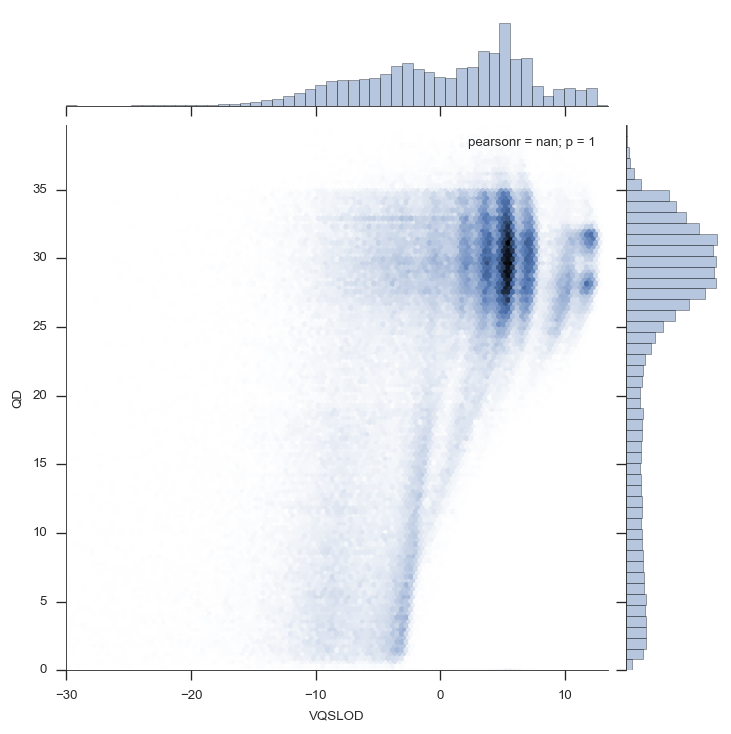

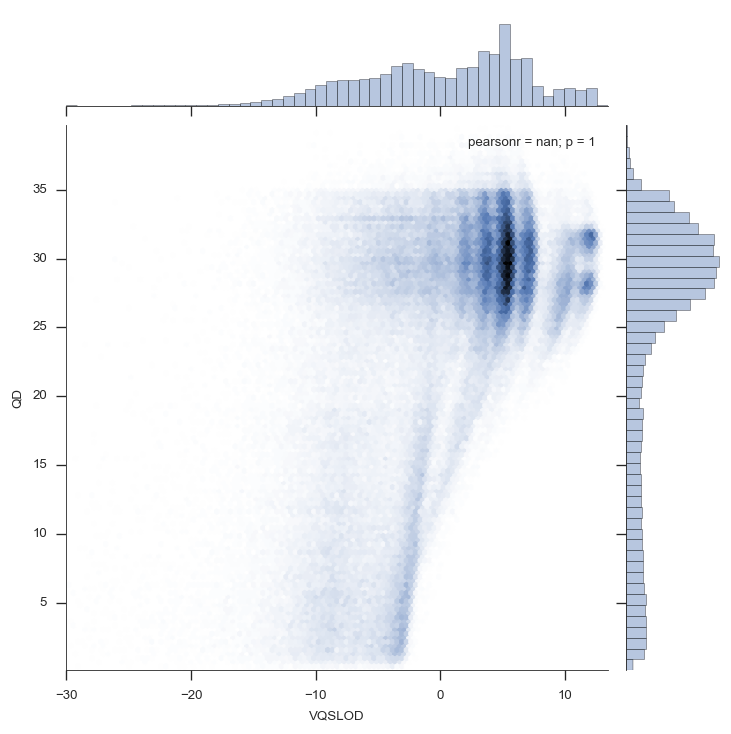

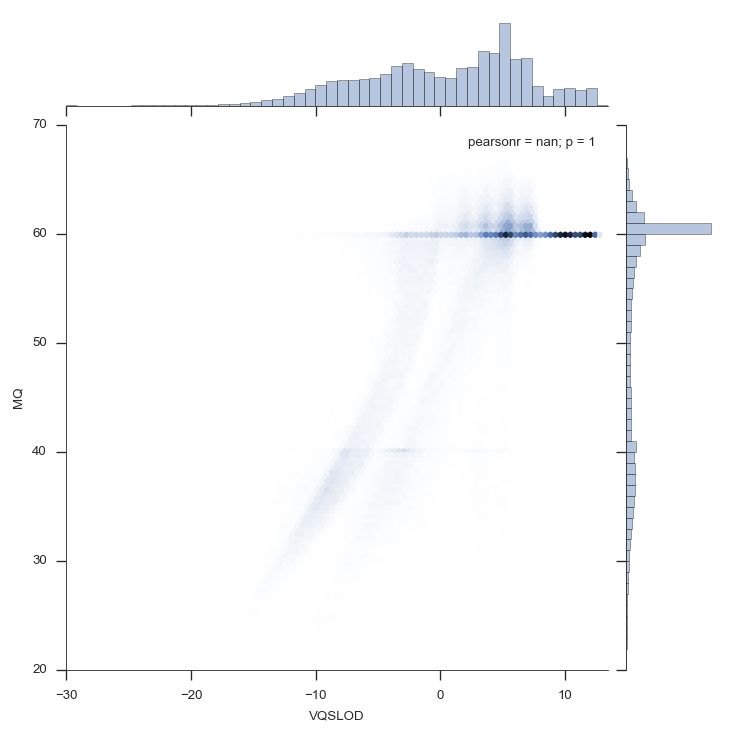

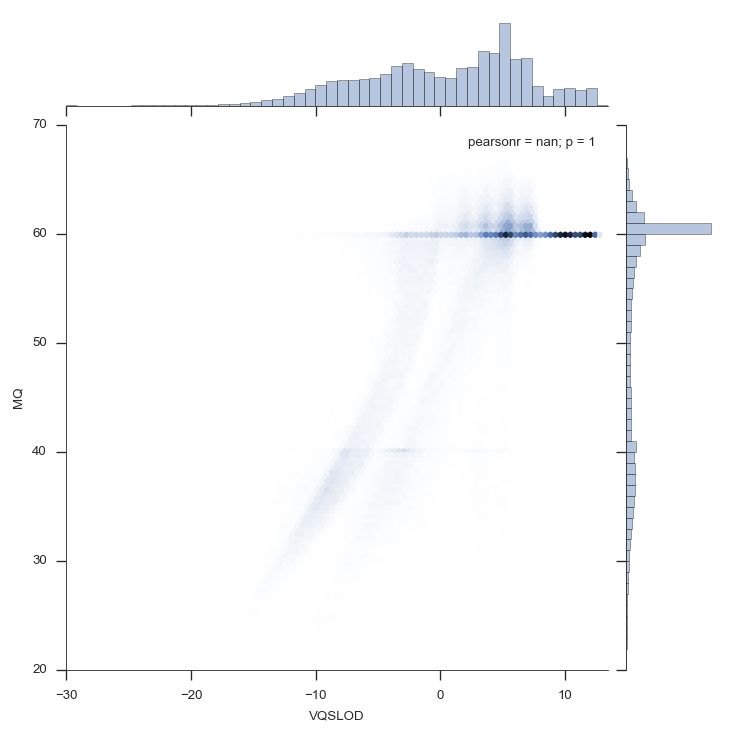

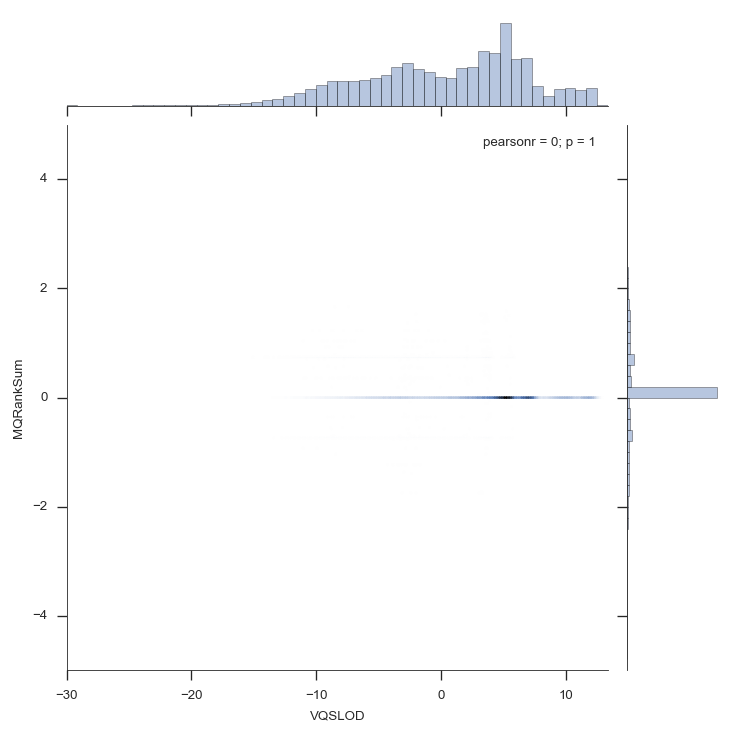

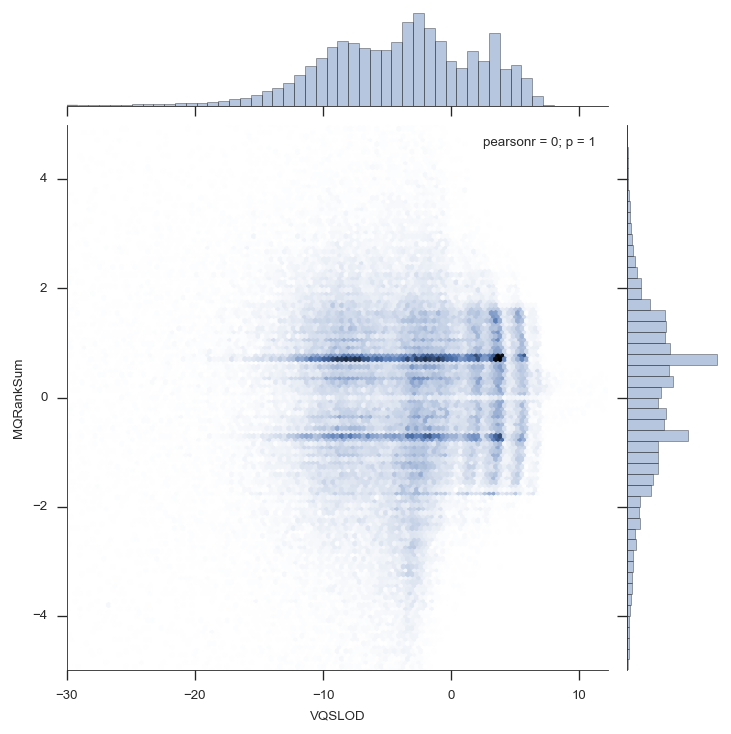

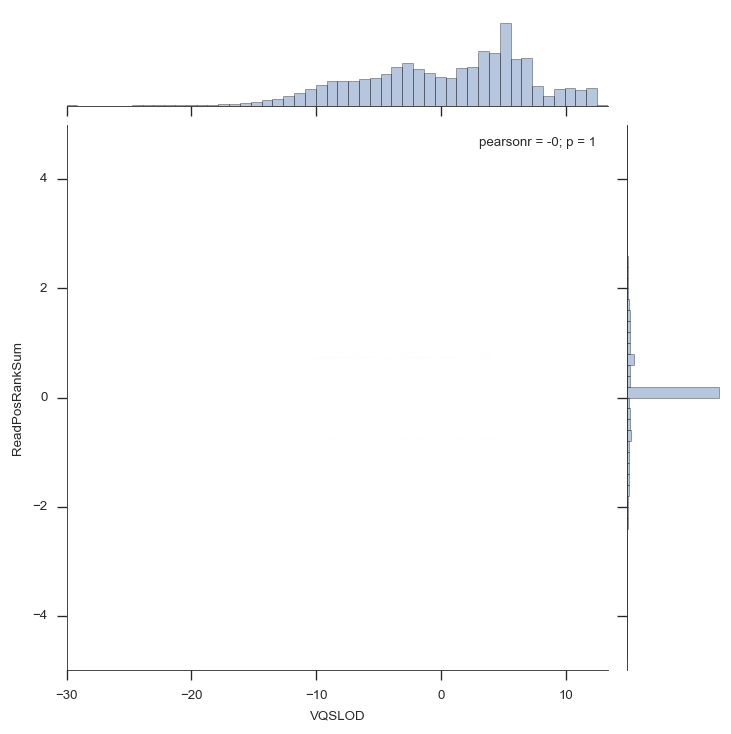

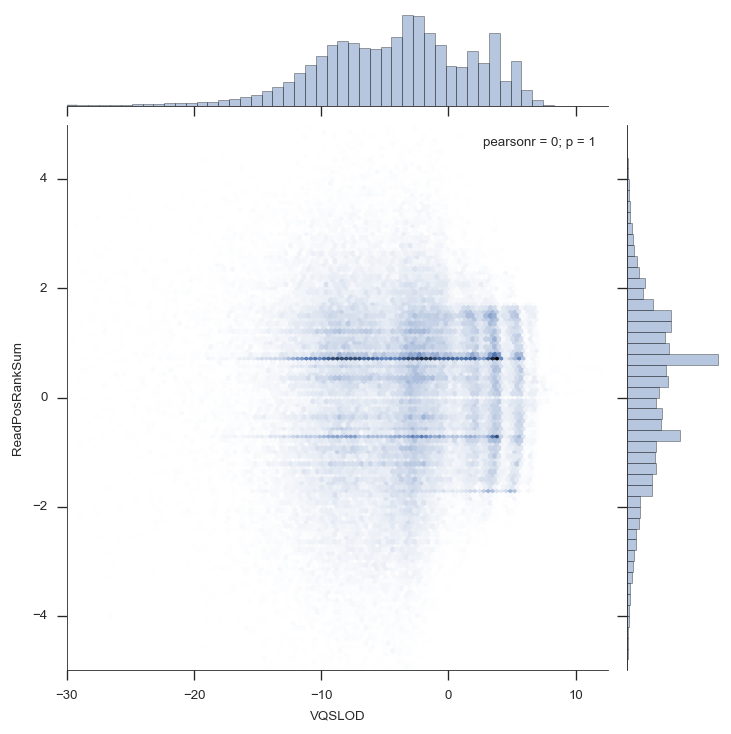

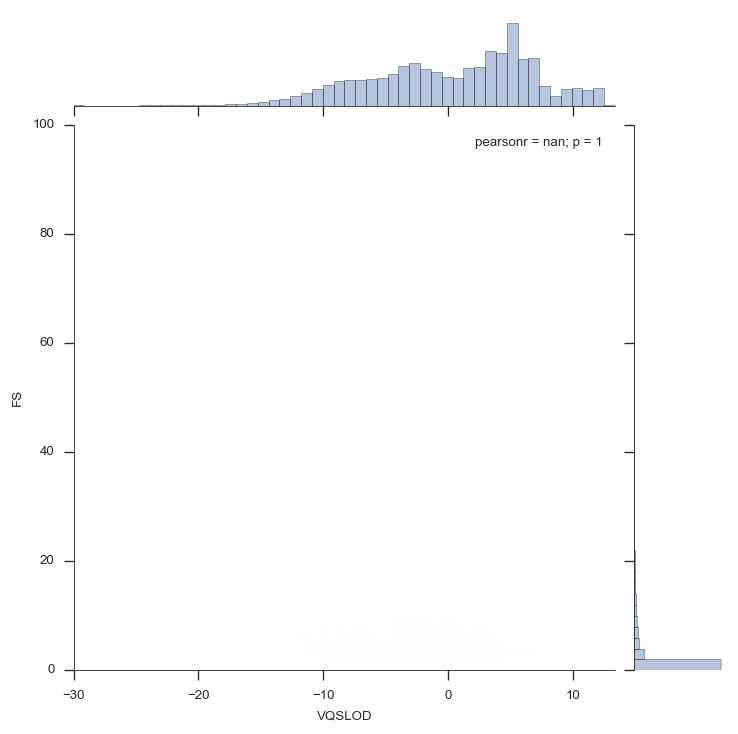

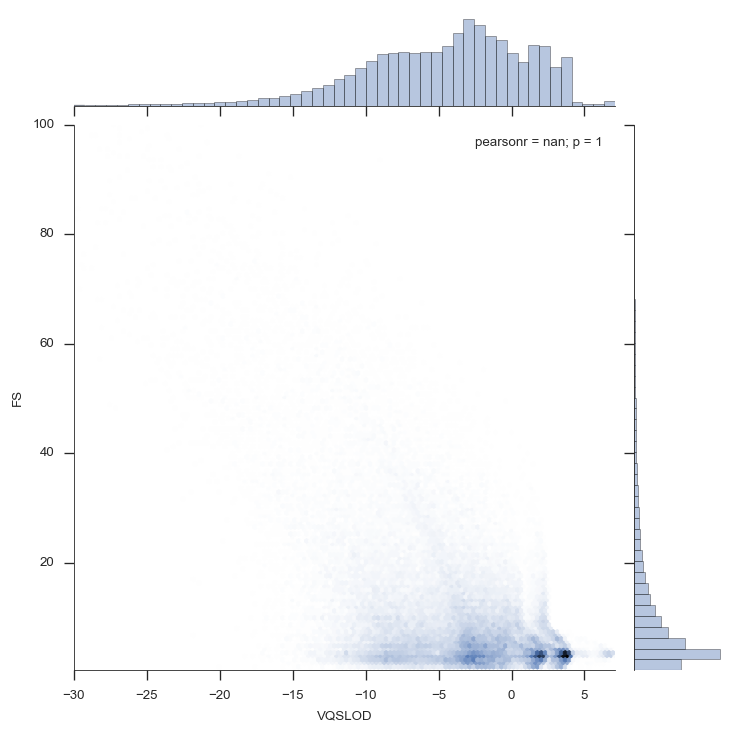

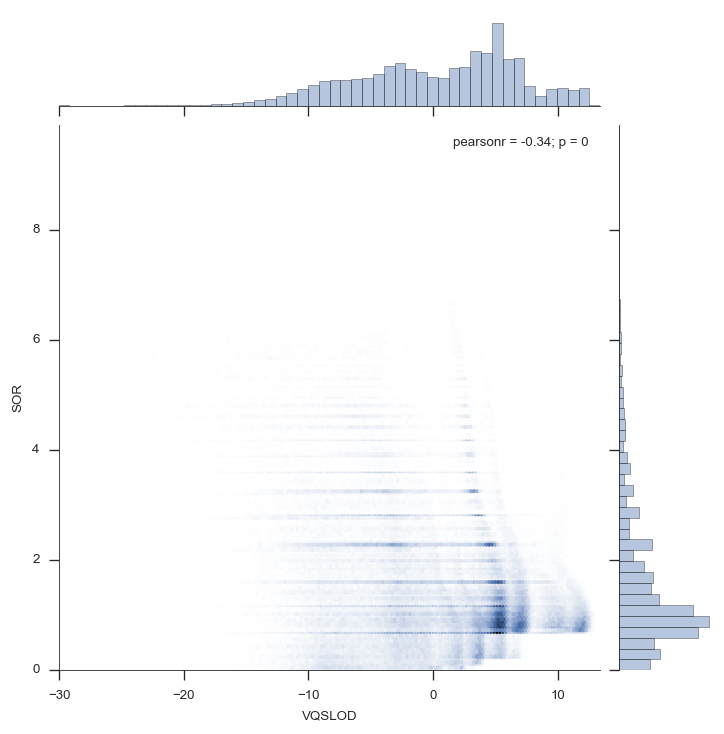

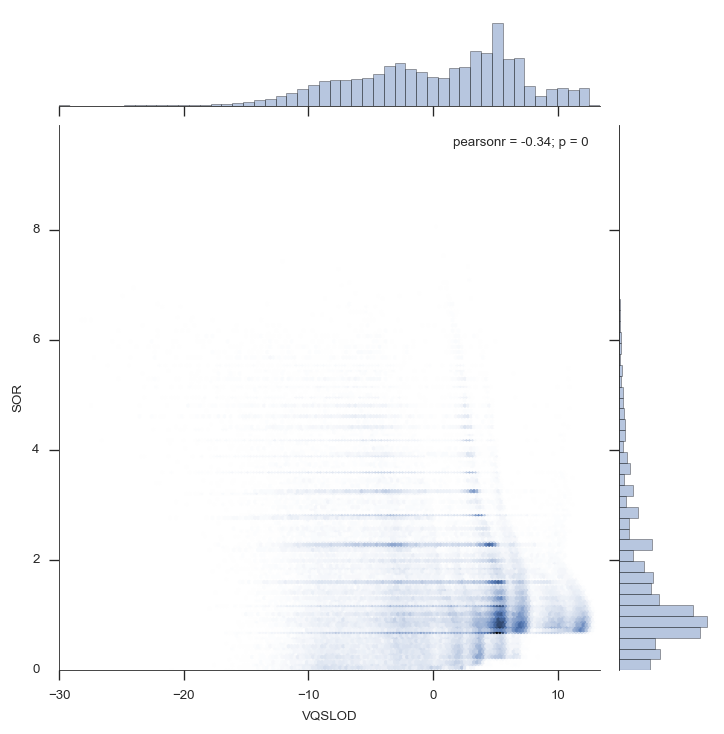

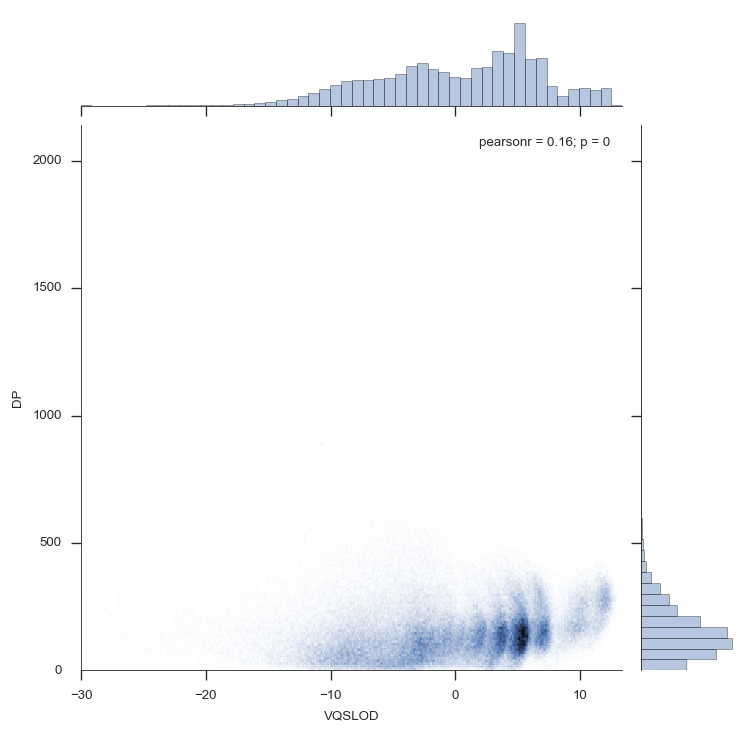

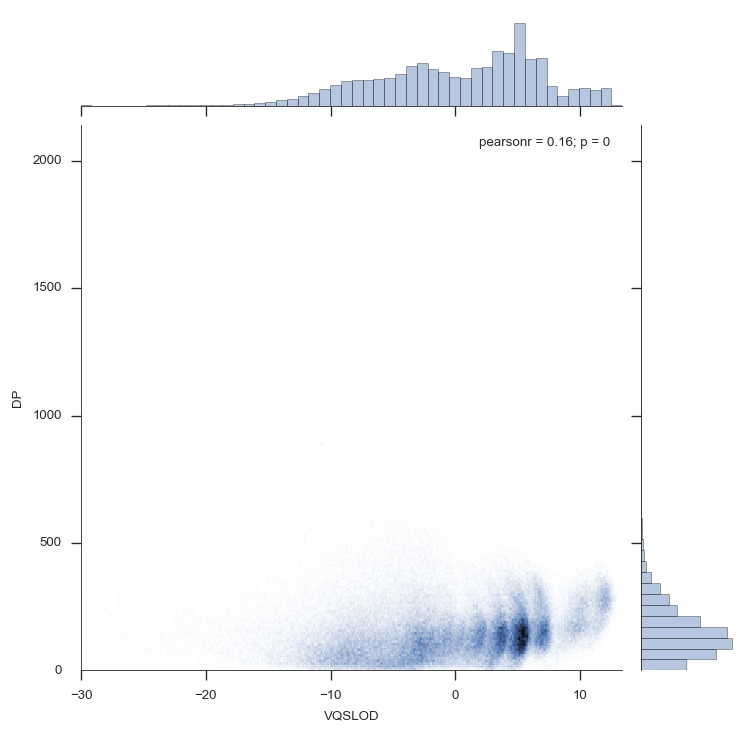

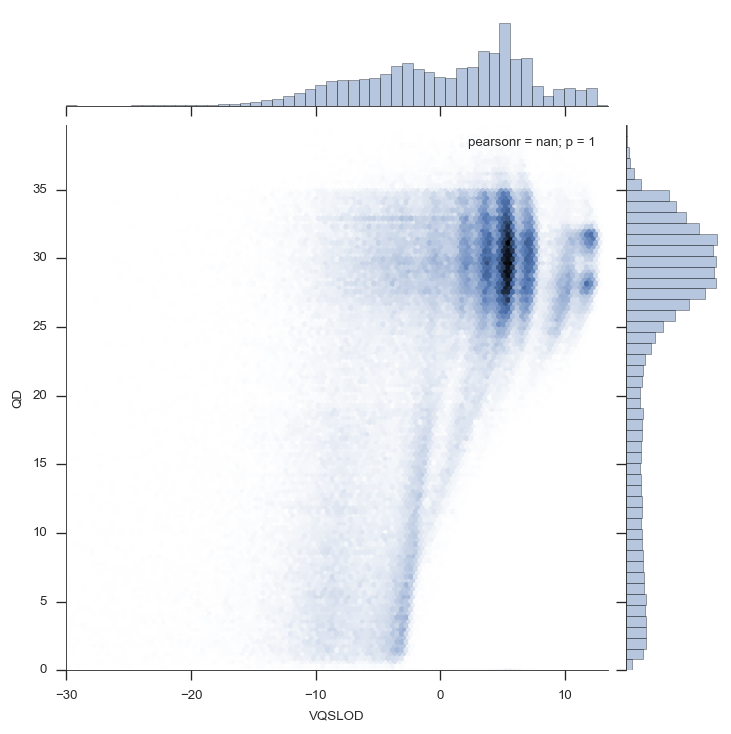

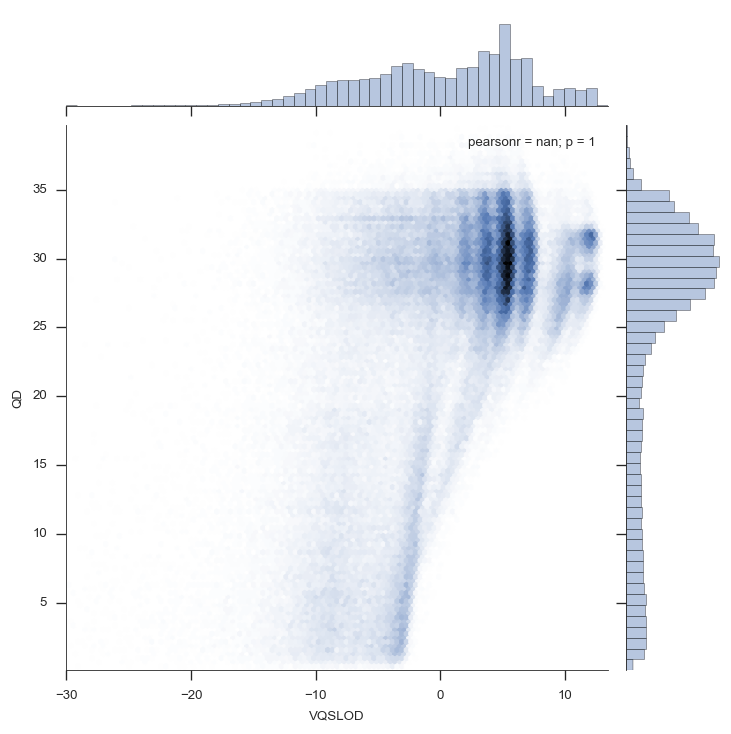

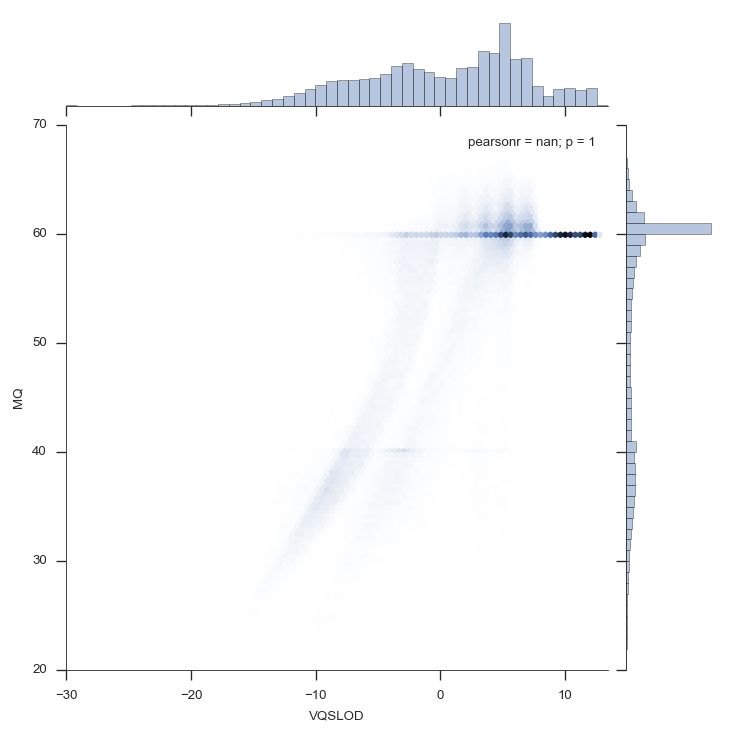

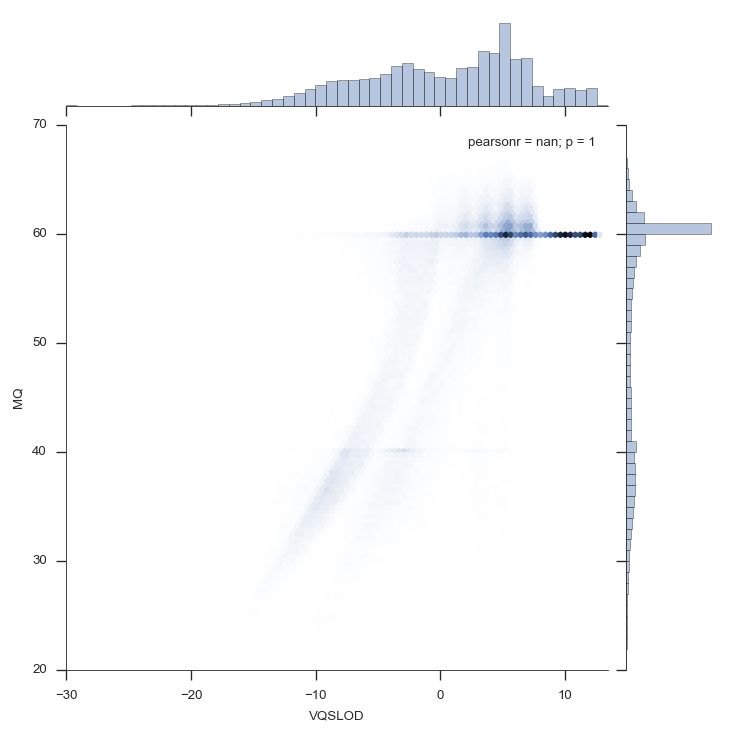

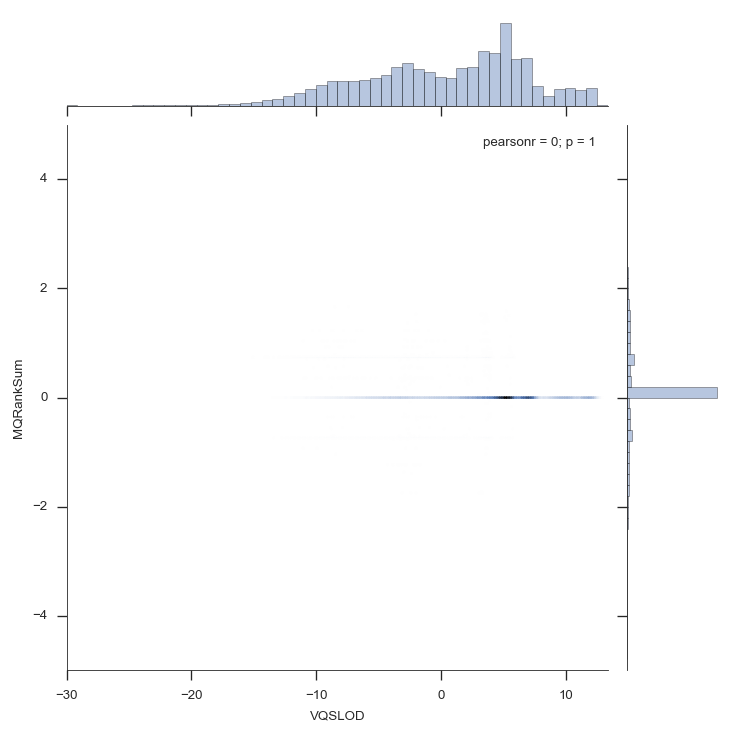

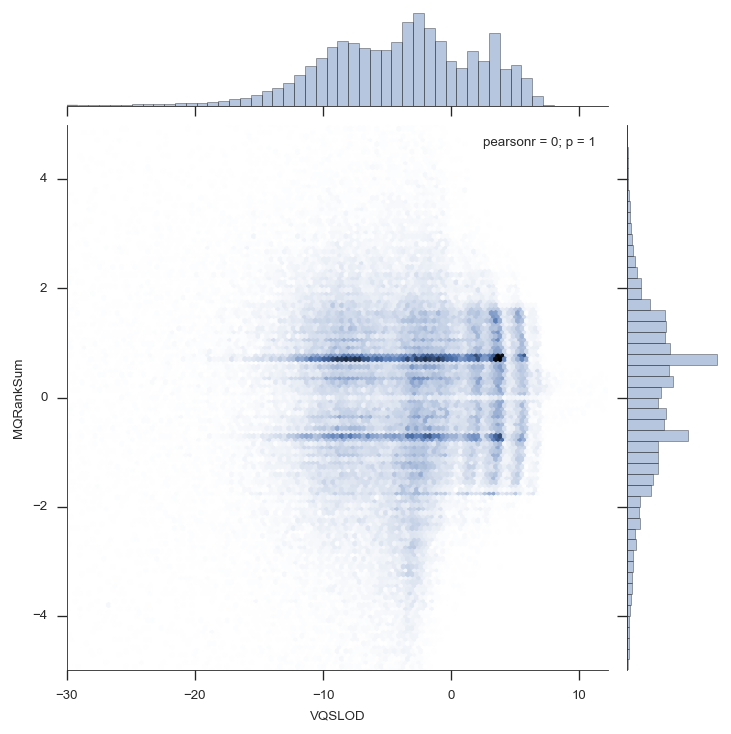

In [62]:
for release in SITES_NPY_FNS:
    if release == 'release3':
        continue
    variants = np.load(SITES_NPY_FNS['release4_5validation'])
    for input_variable in input_variables:
        print(release, input_variable)
        if input_variable=='VQSLOD':
            continue
        if input_variable == 'DP':
            xlim = xlims[input_variable][release]
        else:
            xlim = xlims[input_variable]
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable] >= xlim[0]) & (variants[input_variable] <= xlim[1])
        )
        g = sns.jointplot(
            variants['VQSLOD'][variants_to_plot],
            variants[input_variable][variants_to_plot],
            kind="hex"
        ).set_axis_labels("VQSLOD", input_variable)
        
#         if np.sum(variants[input_variable] == 0.0) > 0:
#             variants_to_plot = (
#                 (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
#                 (variants[input_variable] >= xlim[0]) & (variants[input_variable] <= xlim[1]) &
#                 (variants[input_variable] == 0.0)
#             )
#             g = sns.jointplot(
#                 variants['VQSLOD'][variants_to_plot],
#                 variants[input_variable][variants_to_plot],
#                 kind="hex"
#             ).set_axis_labels("VQSLOD", input_variable)

        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable] >= xlim[0]) & (variants[input_variable] <= xlim[1]) &
            (variants[input_variable] != 0.0)
        )
        g = sns.jointplot(
            variants['VQSLOD'][variants_to_plot],
            variants[input_variable][variants_to_plot],
            kind="hex"
        ).set_axis_labels("VQSLOD", input_variable)


release4
--------------------
release4_5validation
--------------------
interim5
--------------------


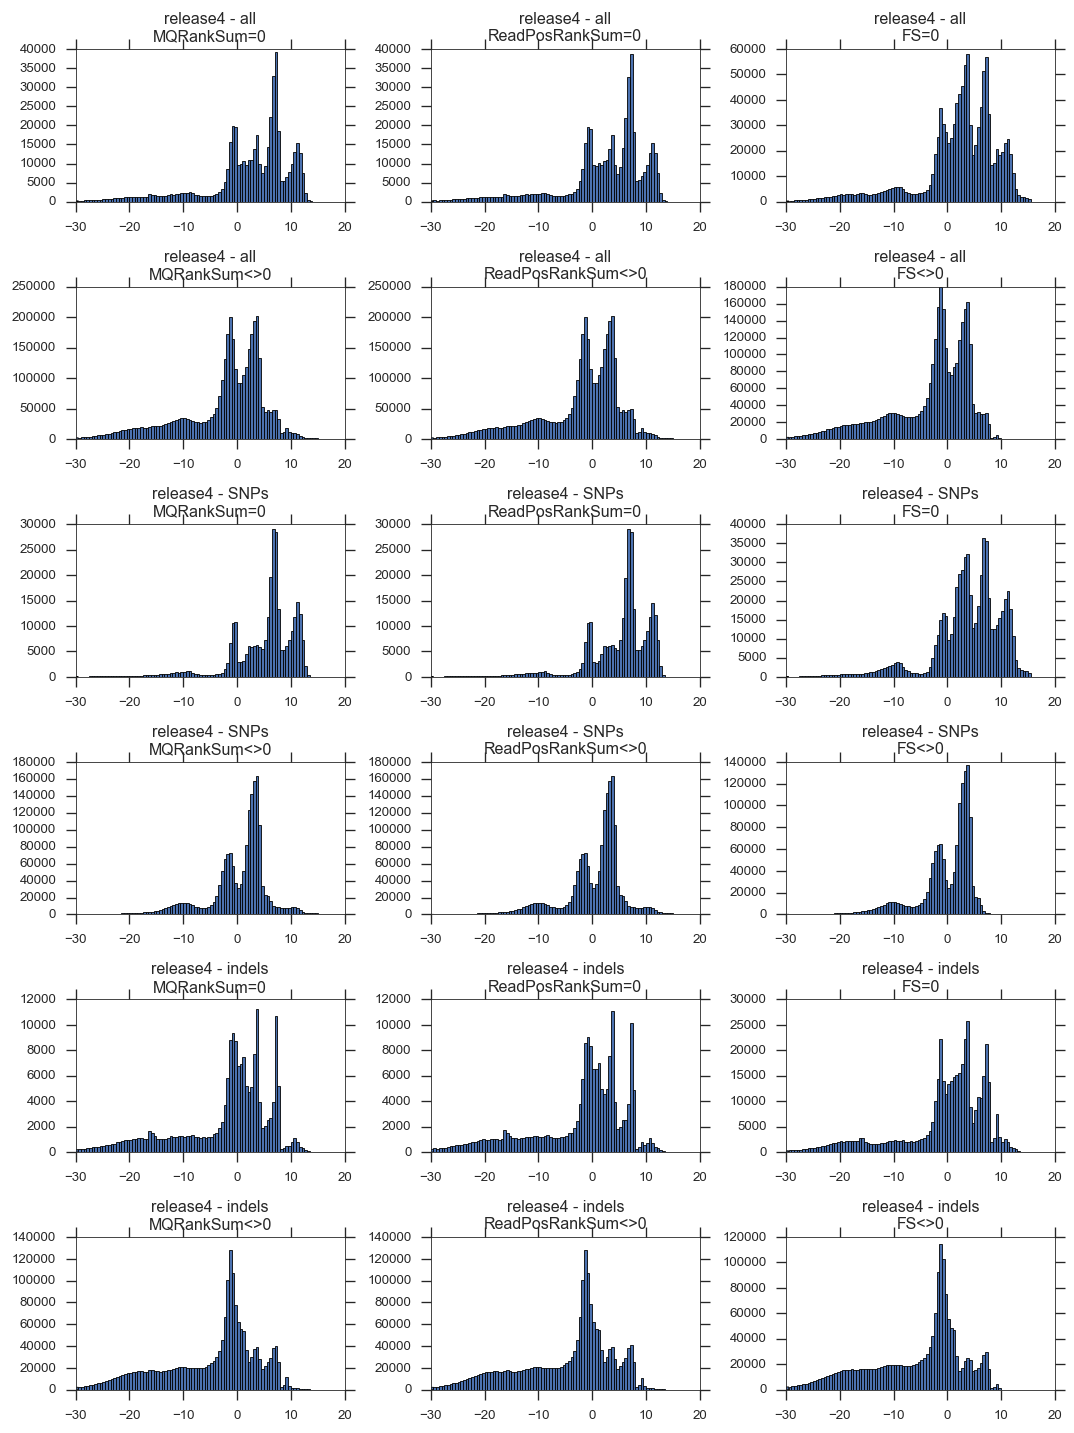

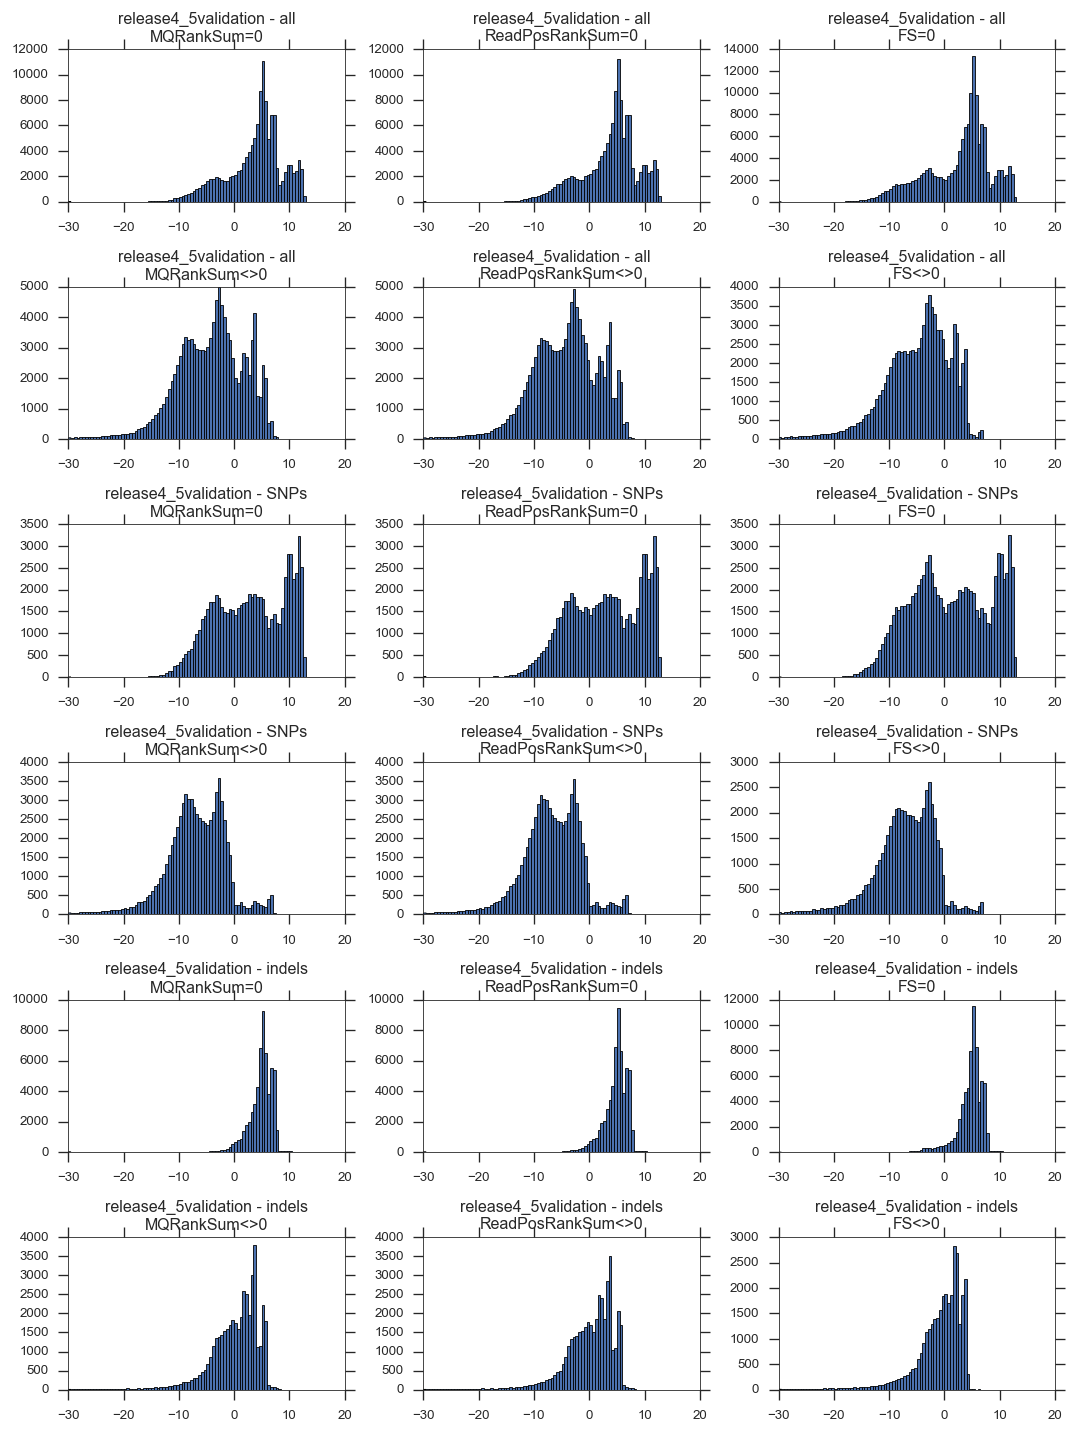

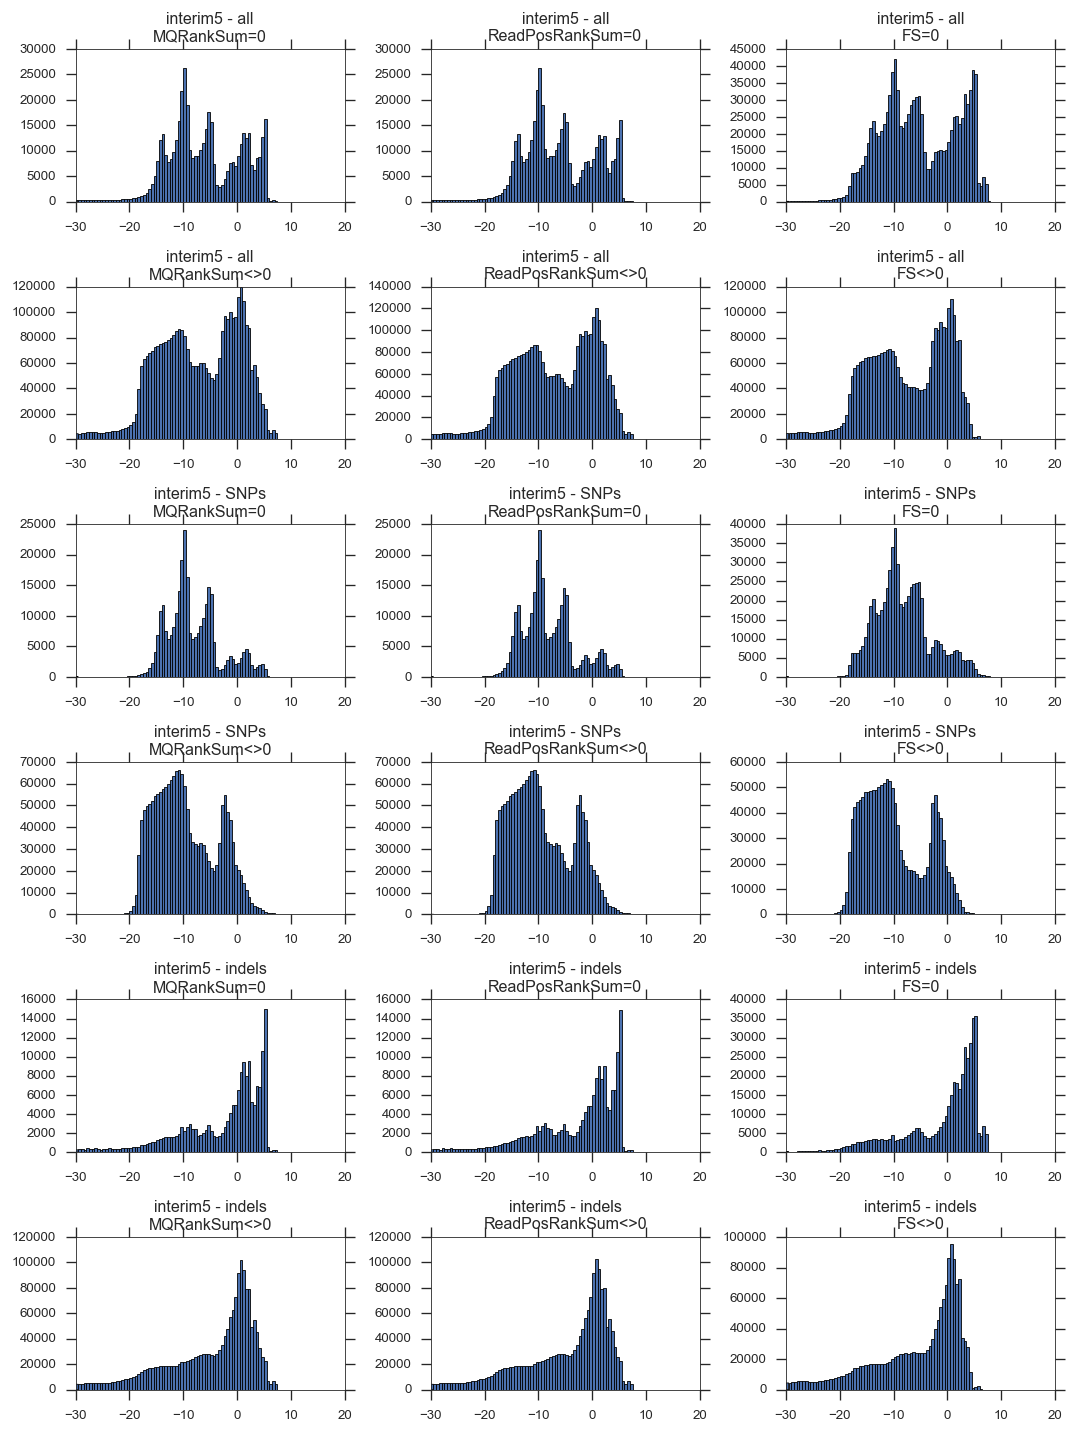

In [60]:
for release in SITES_NPY_FNS:
# for release in ['release4_5validation']:
    if release=='release3':
        continue
    print('%s\n--------------------' % release)
    variants = np.load(SITES_NPY_FNS[release])

    fig = plt.figure(figsize=(9, 12))
    for i, input_variable in enumerate(['MQRankSum', 'ReadPosRankSum', 'FS']):
        ax = fig.add_subplot(6, 3, i+1)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]==0.0)
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - all\n%s=0" % (release, input_variable))
        
        ax = fig.add_subplot(6, 3, i+4)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]!=0.0)
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - all\n%s<>0" % (release, input_variable))

        ax = fig.add_subplot(6, 3, i+7)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]==0.0) & (variants['is_snp'])
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - SNPs\n%s=0" % (release, input_variable))
        
        ax = fig.add_subplot(6, 3, i+10)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]!=0.0) & (variants['is_snp'])
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - SNPs\n%s<>0" % (release, input_variable))

        ax = fig.add_subplot(6, 3, i+13)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]==0.0) & np.logical_not(variants['is_snp'])
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - indels\n%s=0" % (release, input_variable))
        
        ax = fig.add_subplot(6, 3, i+16)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]!=0.0) & np.logical_not(variants['is_snp'])
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - indels\n%s<>0" % (release, input_variable))

    fig.tight_layout()


release4
--------------------
release4_5validation
--------------------
interim5
--------------------


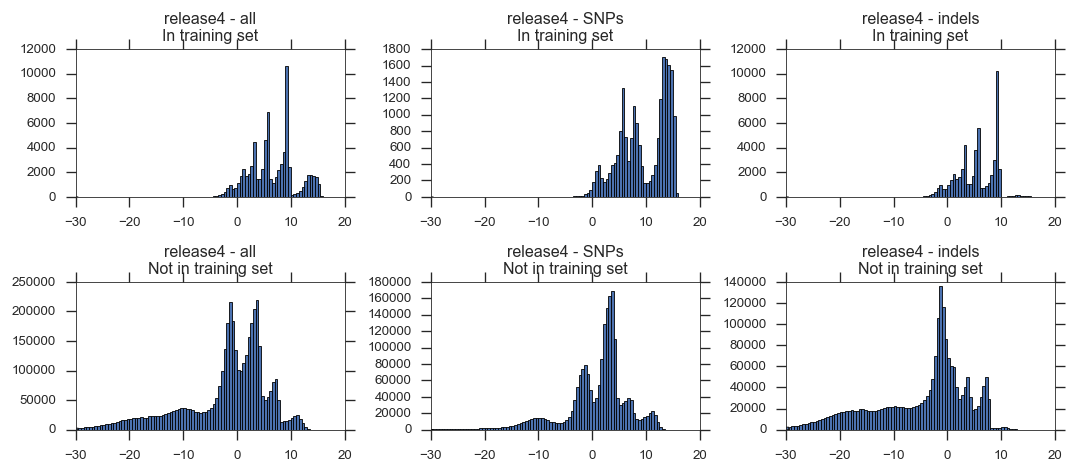

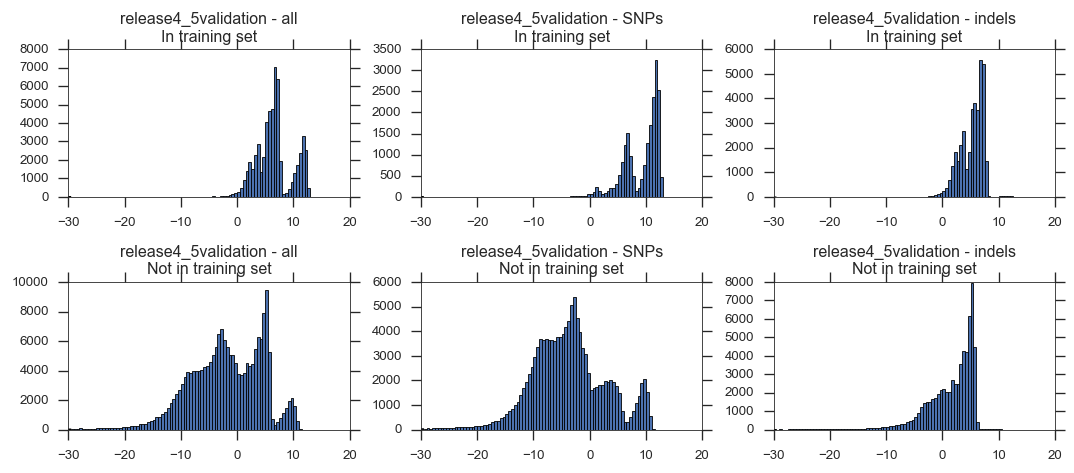

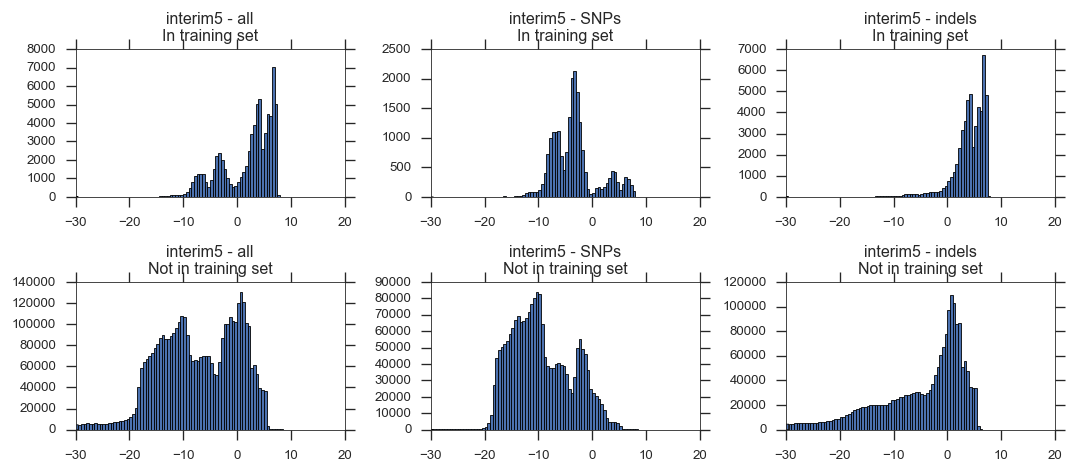

In [79]:
for release in SITES_NPY_FNS:
# for release in ['release4_5validation']:
    if release=='release3':
        continue
    print('%s\n--------------------' % release)
    variants = np.load(SITES_NPY_FNS[release])

    fig = plt.figure(figsize=(9, 4))
    
    ax = fig.add_subplot(2, 3, 1)
    variants_to_plot = (
        (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
        np.in1d(variants[['CHROM', 'POS']], training_variants)
    )
    bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
    ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
    ax.set_title("%s - all\nIn training set" % (release))

    ax = fig.add_subplot(2, 3, 4)
    variants_to_plot = (
        (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
        np.logical_not(np.in1d(variants[['CHROM', 'POS']], training_variants))
    )
    bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
    ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
    ax.set_title("%s - all\nNot in training set" % (release))

    ax = fig.add_subplot(2, 3, 2)
    variants_to_plot = (
        (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
        np.in1d(variants[['CHROM', 'POS']], training_variants) & (variants['is_snp'])
    )
    bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
    ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
    ax.set_title("%s - SNPs\nIn training set" % (release))

    ax = fig.add_subplot(2, 3, 5)
    variants_to_plot = (
        (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
        np.logical_not(np.in1d(variants[['CHROM', 'POS']], training_variants)) & (variants['is_snp'])
    )
    bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
    ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
    ax.set_title("%s - SNPs\nNot in training set" % (release))

    ax = fig.add_subplot(2, 3, 3)
    variants_to_plot = (
        (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
        np.in1d(variants[['CHROM', 'POS']], training_variants) & np.logical_not(variants['is_snp'])
    )
    bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
    ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
    ax.set_title("%s - indels\nIn training set" % (release))

    ax = fig.add_subplot(2, 3, 6)
    variants_to_plot = (
        (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
        np.logical_not(np.in1d(variants[['CHROM', 'POS']], training_variants)) & np.logical_not(variants['is_snp'])
    )
    bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
    ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
    ax.set_title("%s - indels\nNot in training set" % (release))


    fig.tight_layout()


release4
--------------------
release4_5validation
--------------------
interim5
--------------------


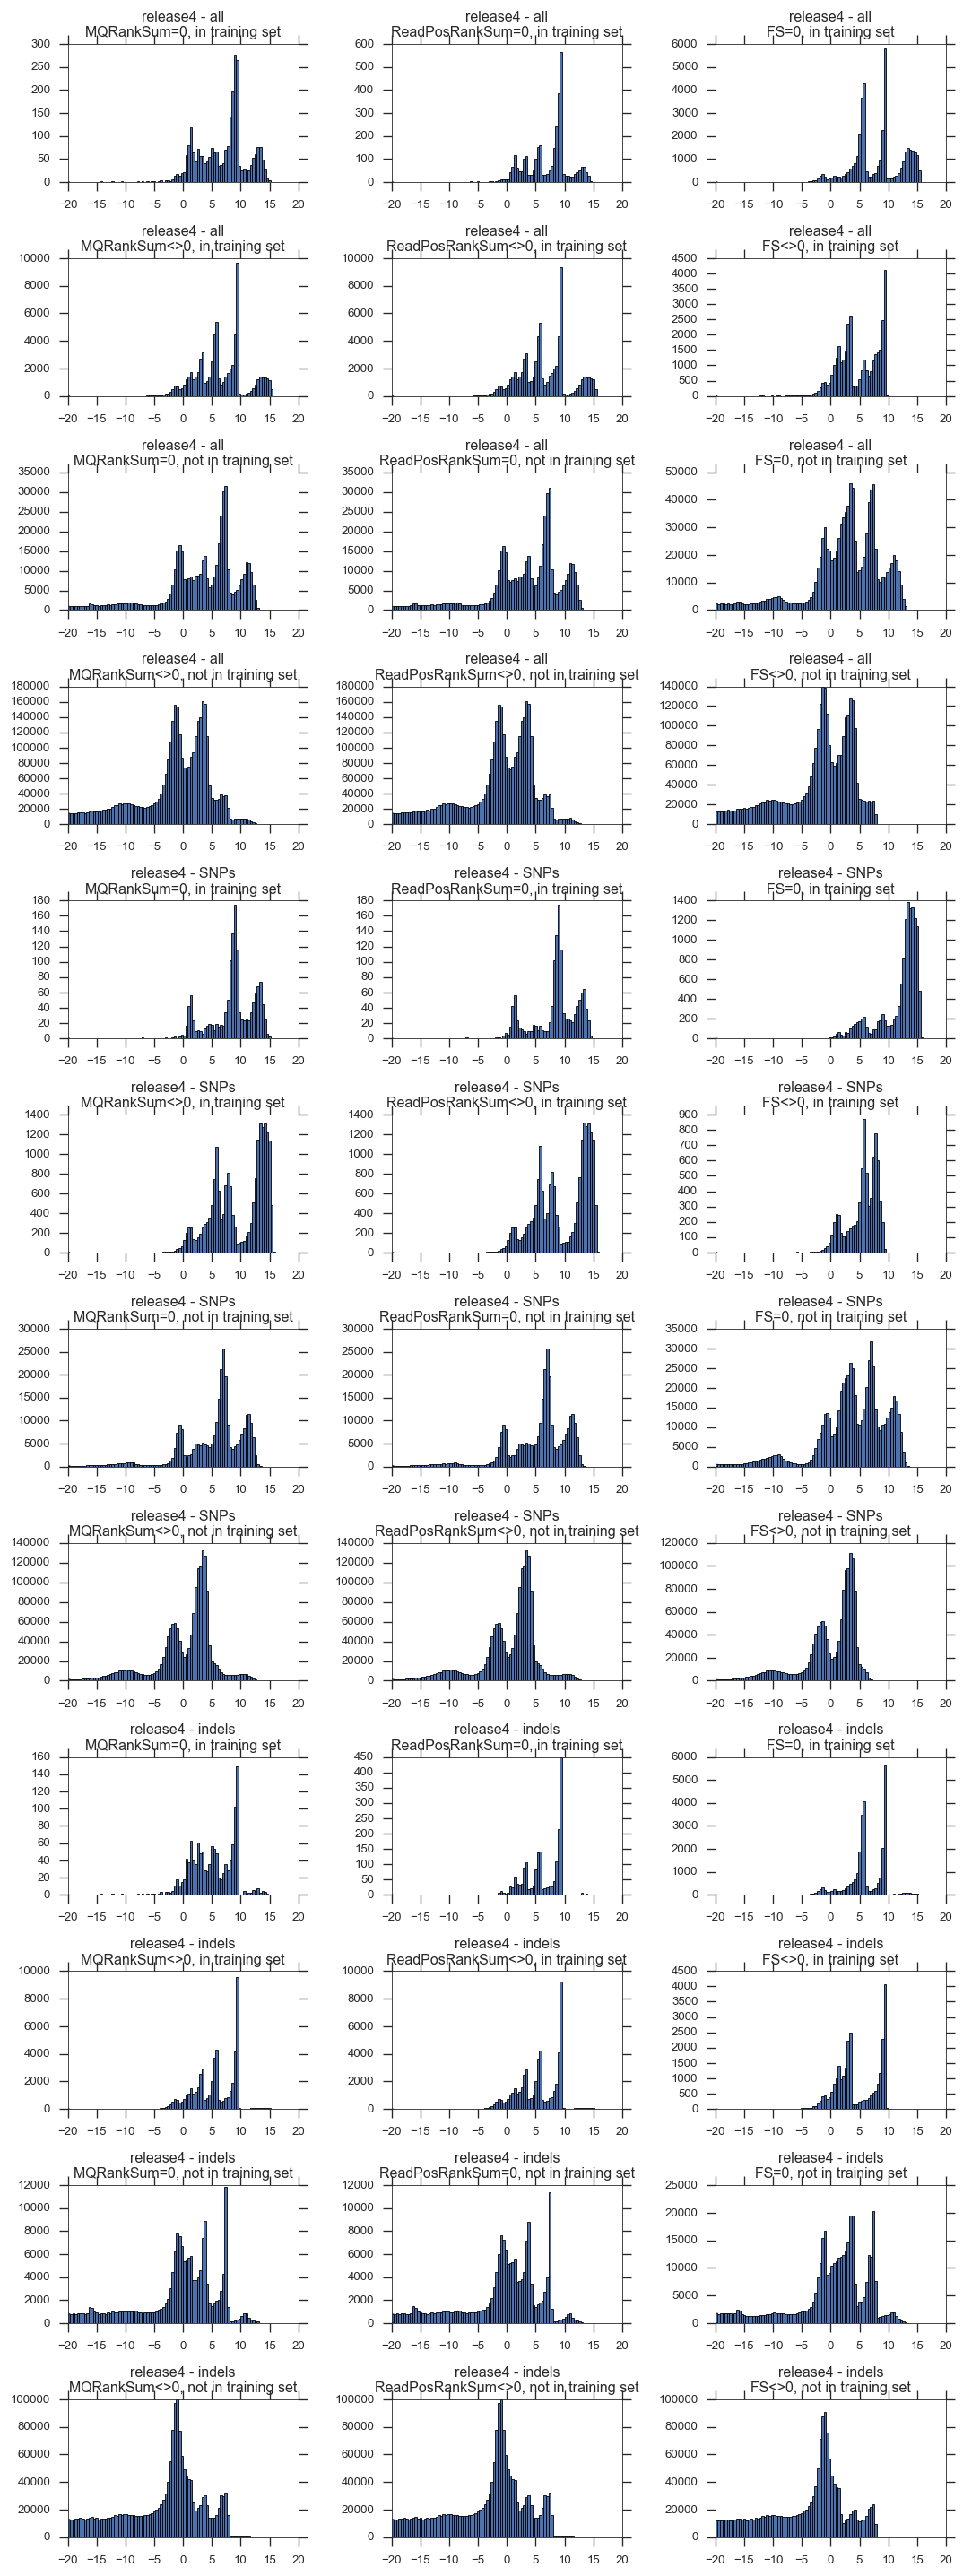

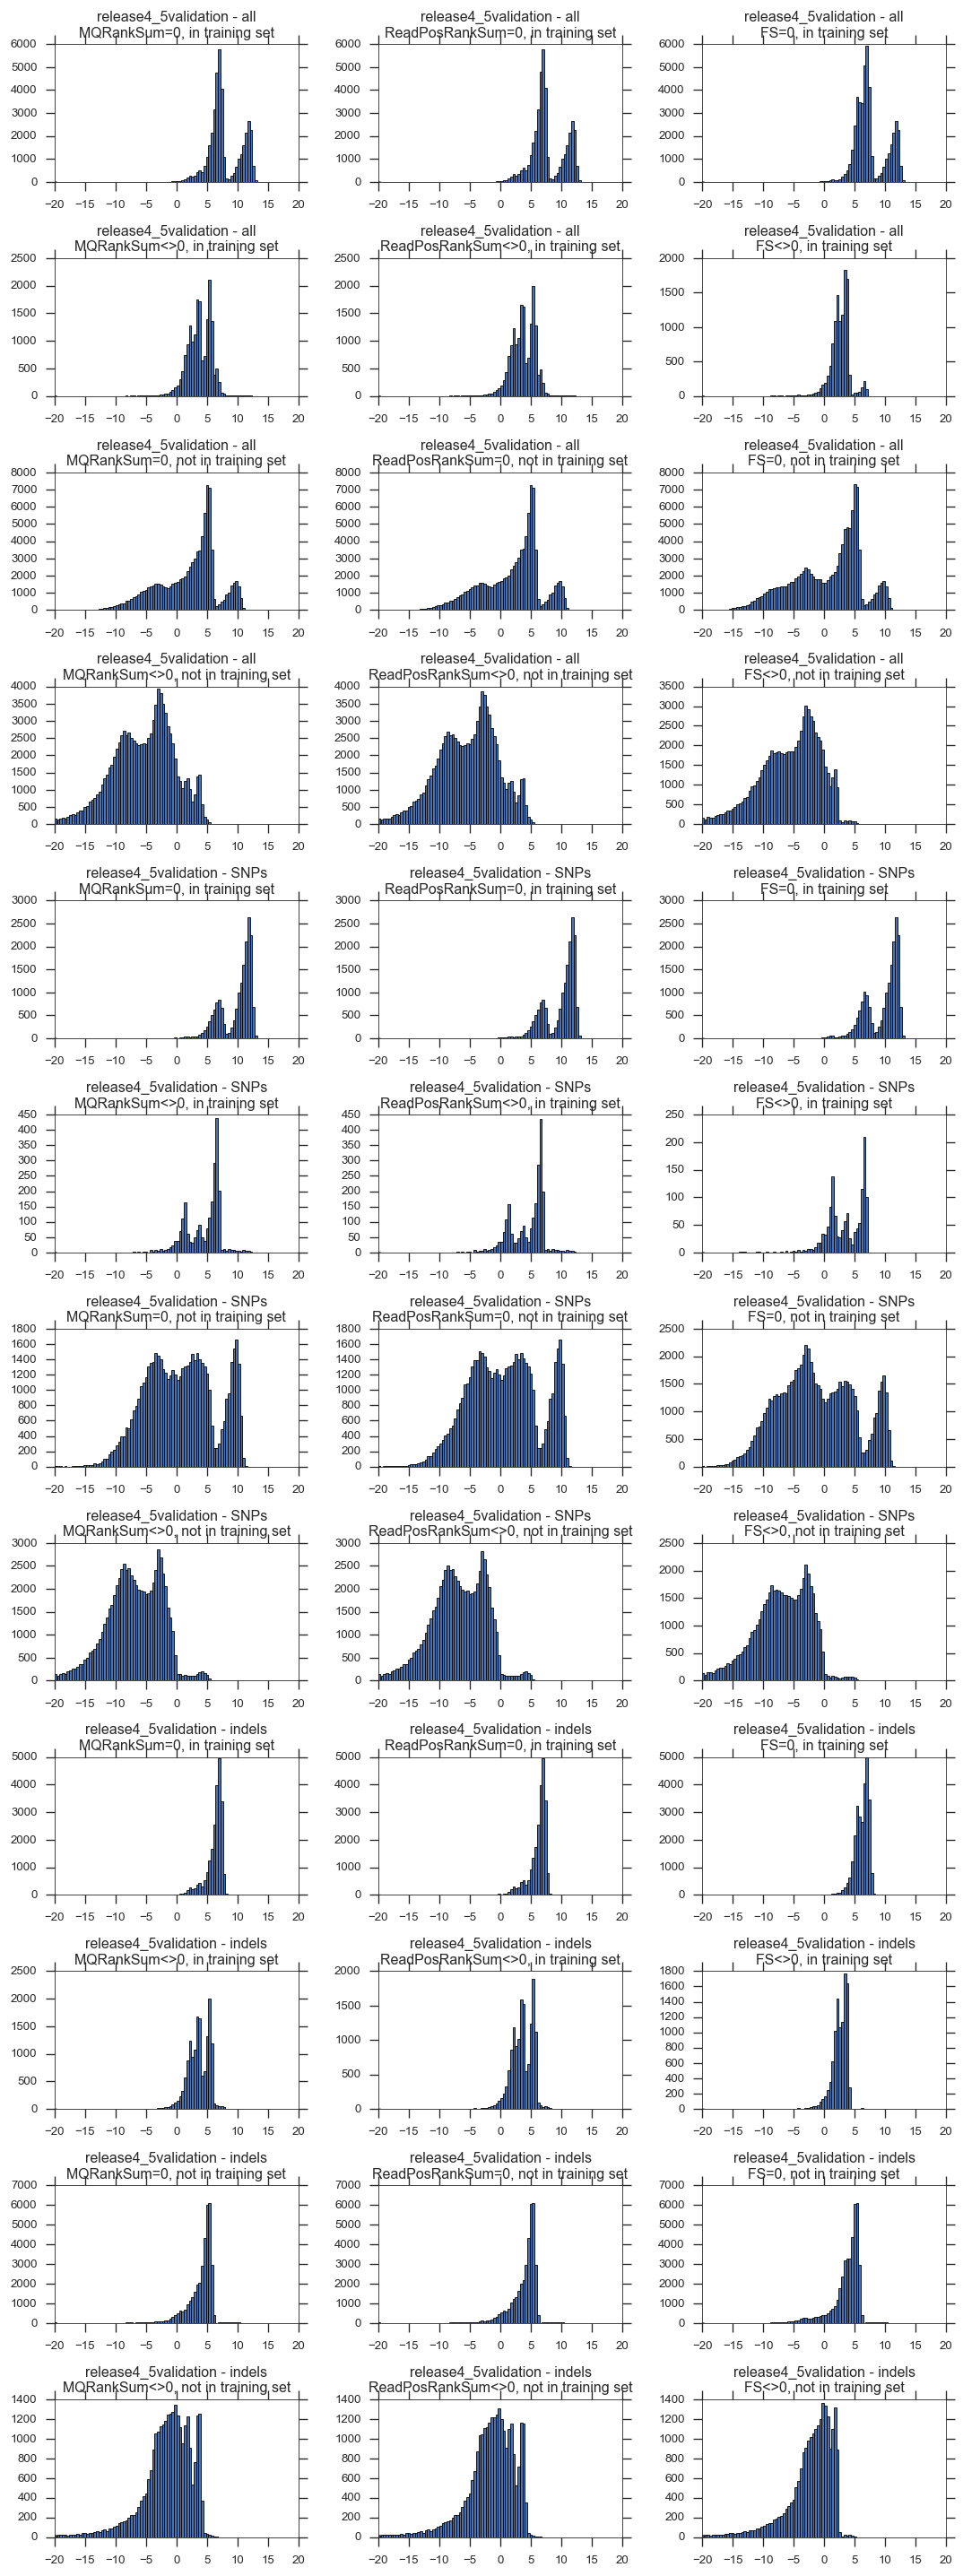

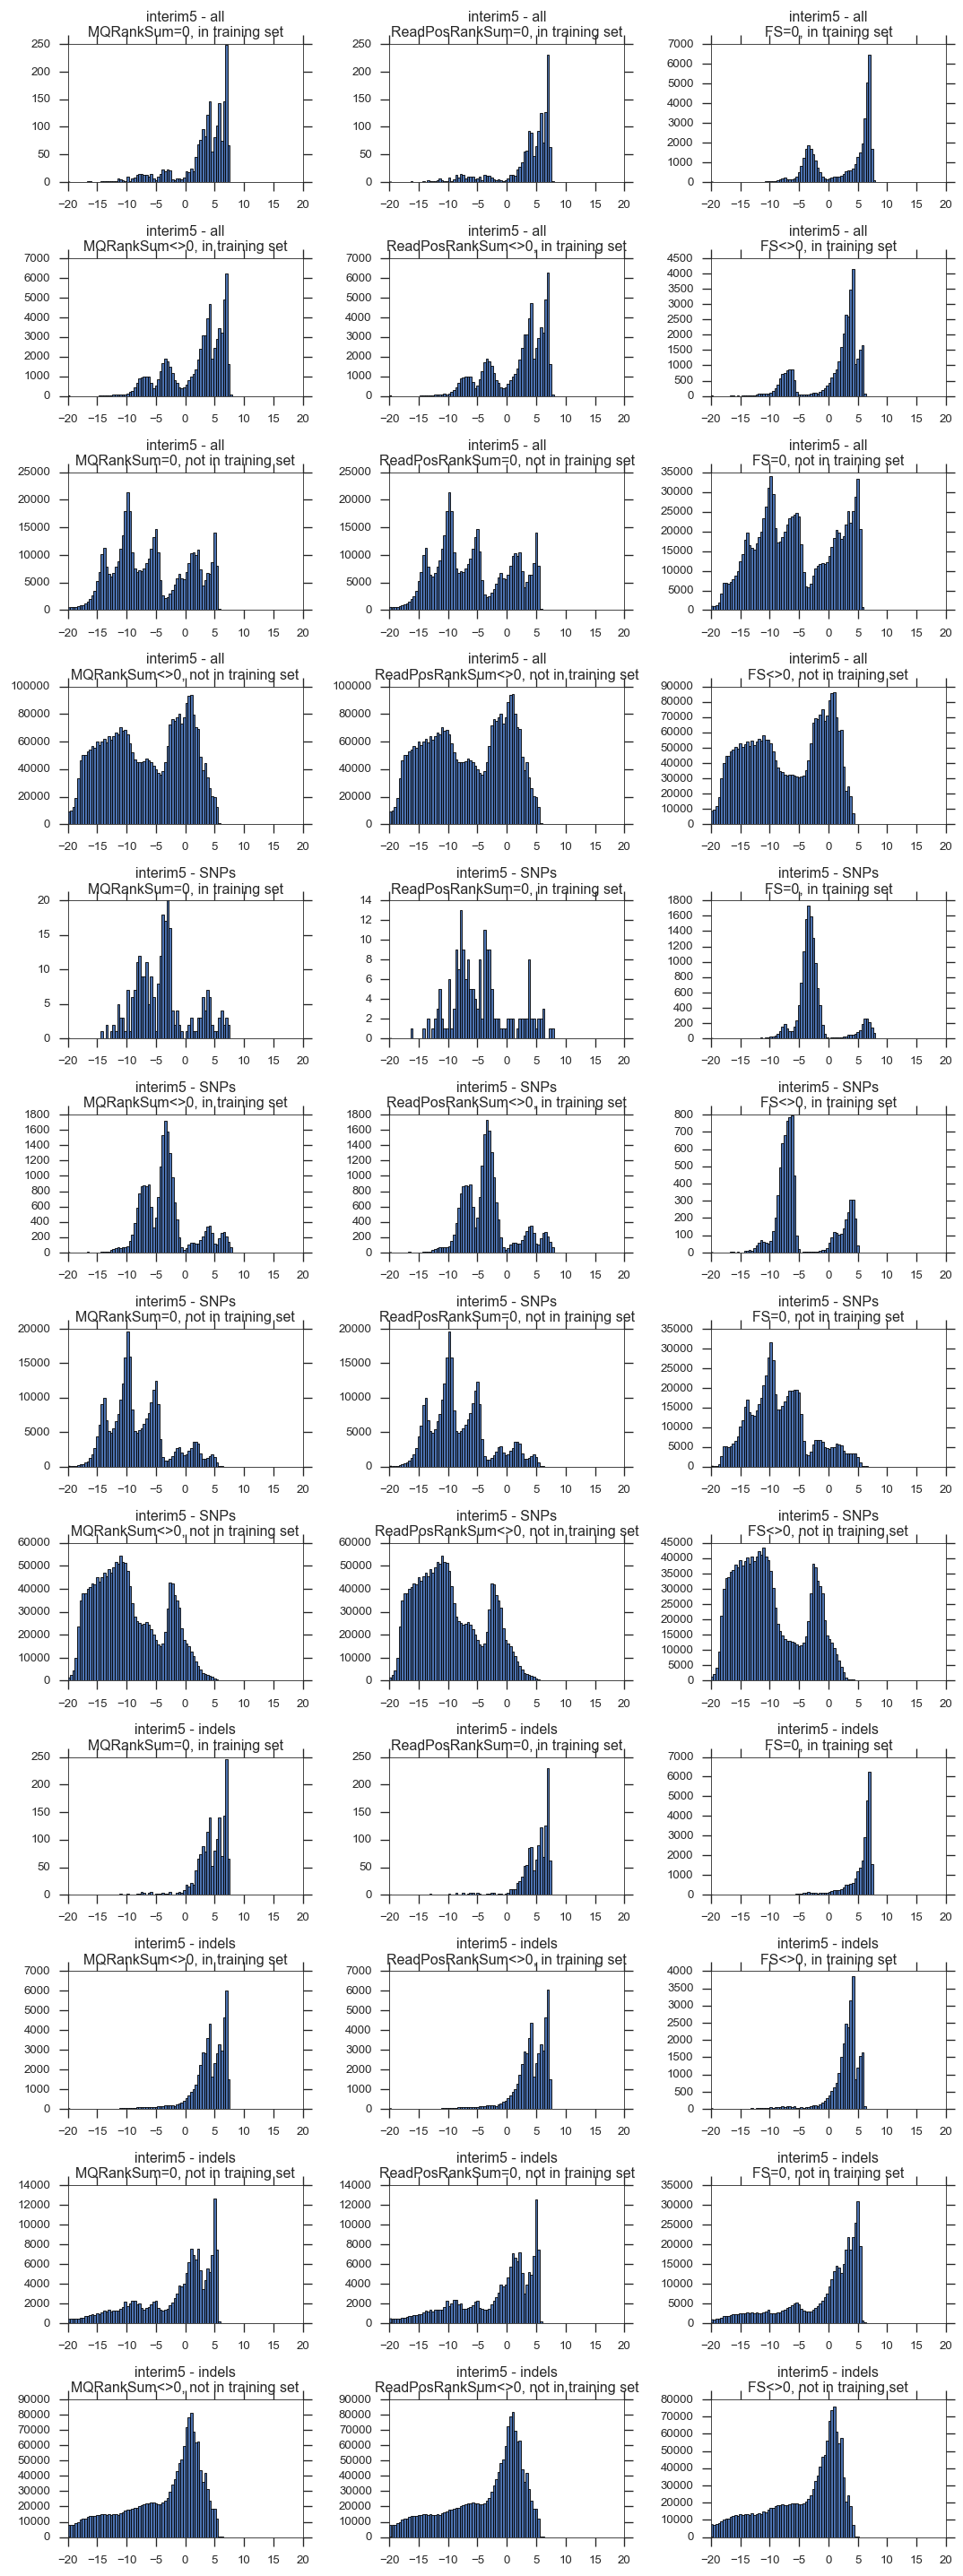

In [92]:
for release in SITES_NPY_FNS:
# for release in ['release4_5validation']:
    if release=='release3':
        continue
    print('%s\n--------------------' % release)
    variants = np.load(SITES_NPY_FNS[release])

    fig = plt.figure(figsize=(9, 24))
    for i, input_variable in enumerate(['MQRankSum', 'ReadPosRankSum', 'FS']):
        ax = fig.add_subplot(12, 3, i+1)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]==0.0) &
            (np.in1d(variants[['CHROM', 'POS']], training_variants))
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - all\n%s=0, in training set" % (release, input_variable))
        
        ax = fig.add_subplot(12, 3, i+4)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]!=0.0) &
            (np.in1d(variants[['CHROM', 'POS']], training_variants))
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - all\n%s<>0, in training set" % (release, input_variable))

        ax = fig.add_subplot(12, 3, i+7)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]==0.0) &
            np.logical_not(np.in1d(variants[['CHROM', 'POS']], training_variants))
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - all\n%s=0, not in training set" % (release, input_variable))
        
        ax = fig.add_subplot(12, 3, i+10)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]!=0.0) &
            np.logical_not(np.in1d(variants[['CHROM', 'POS']], training_variants))
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - all\n%s<>0, not in training set" % (release, input_variable))

        ax = fig.add_subplot(12, 3, i+13)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]==0.0) & (variants['is_snp']) &
            (np.in1d(variants[['CHROM', 'POS']], training_variants))
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - SNPs\n%s=0, in training set" % (release, input_variable))
        
        ax = fig.add_subplot(12, 3, i+16)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]!=0.0) & (variants['is_snp']) &
            (np.in1d(variants[['CHROM', 'POS']], training_variants))
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - SNPs\n%s<>0, in training set" % (release, input_variable))

        ax = fig.add_subplot(12, 3, i+19)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]==0.0) & (variants['is_snp']) &
            np.logical_not(np.in1d(variants[['CHROM', 'POS']], training_variants))
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - SNPs\n%s=0, not in training set" % (release, input_variable))
        
        ax = fig.add_subplot(12, 3, i+22)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]!=0.0) & (variants['is_snp']) &
            np.logical_not(np.in1d(variants[['CHROM', 'POS']], training_variants))
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - SNPs\n%s<>0, not in training set" % (release, input_variable))

        ax = fig.add_subplot(12, 3, i+25)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]==0.0) & np.logical_not(variants['is_snp']) &
            (np.in1d(variants[['CHROM', 'POS']], training_variants))
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - indels\n%s=0, in training set" % (release, input_variable))
        
        ax = fig.add_subplot(12, 3, i+28)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]!=0.0) & np.logical_not(variants['is_snp']) &
            (np.in1d(variants[['CHROM', 'POS']], training_variants))
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - indels\n%s<>0, in training set" % (release, input_variable))

        ax = fig.add_subplot(12, 3, i+31)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]==0.0) & np.logical_not(variants['is_snp']) &
            np.logical_not(np.in1d(variants[['CHROM', 'POS']], training_variants))
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - indels\n%s=0, not in training set" % (release, input_variable))
        
        ax = fig.add_subplot(12, 3, i+34)
        variants_to_plot = (
            (variants['VQSLOD'] >= xlims['VQSLOD'][0]) & (variants['VQSLOD'] <= xlims['VQSLOD'][1]) &
            (variants[input_variable]!=0.0) & np.logical_not(variants['is_snp']) &
            np.logical_not(np.in1d(variants[['CHROM', 'POS']], training_variants))
        )
        bins = np.linspace(xlims['VQSLOD'][0], xlims['VQSLOD'][1], 101)
        ax.hist(variants['VQSLOD'][variants_to_plot], bins=bins)
        ax.set_title("%s - indels\n%s<>0, not in training set" % (release, input_variable))

    fig.tight_layout()


In [7]:
variants_release4 = np.load(SITES_NPY_FNS['release4'])[['CHROM', 'POS', 'is_snp'] + input_variables]
variants_interim5 = np.load(SITES_NPY_FNS['interim5'])[['CHROM', 'POS', 'is_snp'] + input_variables]
r4_in_i5 = np.in1d(variants_release4[['CHROM', 'POS']], variants_interim5[['CHROM', 'POS']])
i5_in_r4 = np.in1d(variants_interim5[['CHROM', 'POS']], variants_release4[['CHROM', 'POS']])
snps_r4_in_i5 = (np.in1d(variants_release4[['CHROM', 'POS']], variants_interim5[['CHROM', 'POS']][variants_interim5['is_snp']]) & variants_release4['is_snp'])
snps_i5_in_r4 = (np.in1d(variants_interim5[['CHROM', 'POS']], variants_release4[['CHROM', 'POS']][variants_release4['is_snp']]) & variants_interim5['is_snp'])
print("r4 all", np.unique(r4_in_i5, return_counts=True))
print("r4 SNPs", np.unique(r4_in_i5[variants_release4['is_snp']], return_counts=True))
print("r4 indels", np.unique(r4_in_i5[np.logical_not(variants_release4['is_snp'])], return_counts=True))
print("i5 all", np.unique(i5_in_r4, return_counts=True))
print("i5 SNPs", np.unique(i5_in_r4[variants_interim5['is_snp']], return_counts=True))
print("i5 indels", np.unique(i5_in_r4[np.logical_not(variants_interim5['is_snp'])], return_counts=True))


r4 all (array([False,  True], dtype=bool), array([   3709, 4197167]))
r4 SNPs (array([False,  True], dtype=bool), array([    892, 2048484]))
r4 indels (array([False,  True], dtype=bool), array([   2817, 2148683]))
i5 all (array([False,  True], dtype=bool), array([  15298, 4197167]))
i5 SNPs (array([False,  True], dtype=bool), array([   4173, 2043429]))
i5 indels (array([False,  True], dtype=bool), array([  11125, 2153738]))


In [112]:
print(892/(892+2048484))
print(4173/(4173+2043429))


0.0004352544384241838
0.002037993711668576


In [89]:
print(np.unique(snps_r4_in_i5, return_counts=True))
print(np.unique(snps_i5_in_r4, return_counts=True))


(array([False,  True], dtype=bool), array([2157656, 2043220]))
(array([False,  True], dtype=bool), array([2169245, 2043220]))


In [82]:
gc.collect()

202657

# Callset differences between releases

In [16]:
xlims = collections.OrderedDict()
xlims['wide'] = collections.OrderedDict()
xlims['wide']['VQSLOD'] = (-30, 20)
xlims['wide']['QD'] = (0, 40)
xlims['wide']['MQ'] = (20, 70)
xlims['wide']['MQRankSum'] = (-5, 5)
xlims['wide']['ReadPosRankSum'] = (-5, 5)
xlims['wide']['FS'] = (0, 100)
xlims['wide']['SOR'] = (0, 10)
xlims['wide']['DP'] = {'release4':(0, 500000), 'release4_5validation':(0, 1000), 'interim5':(0, 500000)}
xlims['narrow'] = collections.OrderedDict()
xlims['narrow']['VQSLOD'] = (-20, 20)
xlims['narrow']['QD'] = (0, 40)
xlims['narrow']['MQ'] = (45, 65)
xlims['narrow']['MQRankSum'] = (-2, 2)
xlims['narrow']['ReadPosRankSum'] = (-2, 2)
xlims['narrow']['FS'] = (0, 20)
xlims['narrow']['SOR'] = (0, 2)
xlims['narrow']['DP'] = {'release4':(0, 500000), 'release4_5validation':(0, 1000), 'interim5':(0, 500000)}
xlims['narrower'] = collections.OrderedDict()
xlims['narrower']['VQSLOD'] = (-20, 20)
xlims['narrower']['QD'] = (0, 40)
xlims['narrower']['MQ'] = (45, 65)
xlims['narrower']['MQRankSum'] = (-1, 1)
xlims['narrower']['ReadPosRankSum'] = (-2, 2)
xlims['narrower']['FS'] = (0, 5)
xlims['narrower']['SOR'] = (0.5, 1)
xlims['narrower']['DP'] = {'release4':(0, 500000), 'release4_5validation':(0, 1000), 'interim5':(0, 500000)}


In [8]:
def plot_callset_differences(
    variants_old=variants_release4, variants_new=variants_interim5, input_variables=input_variables,
    v_old_selection = r4_in_i5, v_new_selection = i5_in_r4,
    figsize=(9, 8), xlims=xlims['wide']
):

    fig = plt.figure(figsize=figsize)

    for i, input_variable in enumerate(input_variables):
#         print(input_variable)
        v_old = variants_old[input_variable][v_old_selection]
        v_new = variants_new[input_variable][v_new_selection]

        if input_variable == 'DP':
            bins = np.linspace(xlims[input_variable]['release4'][0], xlims[input_variable]['release4'][1], 101)
        else:
            bins = np.linspace(xlims[input_variable][0], xlims[input_variable][1], 101)

        H, xedges, yedges = np.histogram2d(v_old, v_new, bins=(bins, bins))

        ax = fig.add_subplot(4, 4, i+1)
        ax.set_title(input_variable)
        im = plt.imshow(H, interpolation='nearest', origin='low',
                    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

        ax = fig.add_subplot(4, 4, i+9)
        ax.set_title("log(%s)" % input_variable)
        im = plt.imshow(np.log(H+1), interpolation='nearest', origin='low',
                    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    fig.tight_layout()


## All variants release 4 vs interim 5

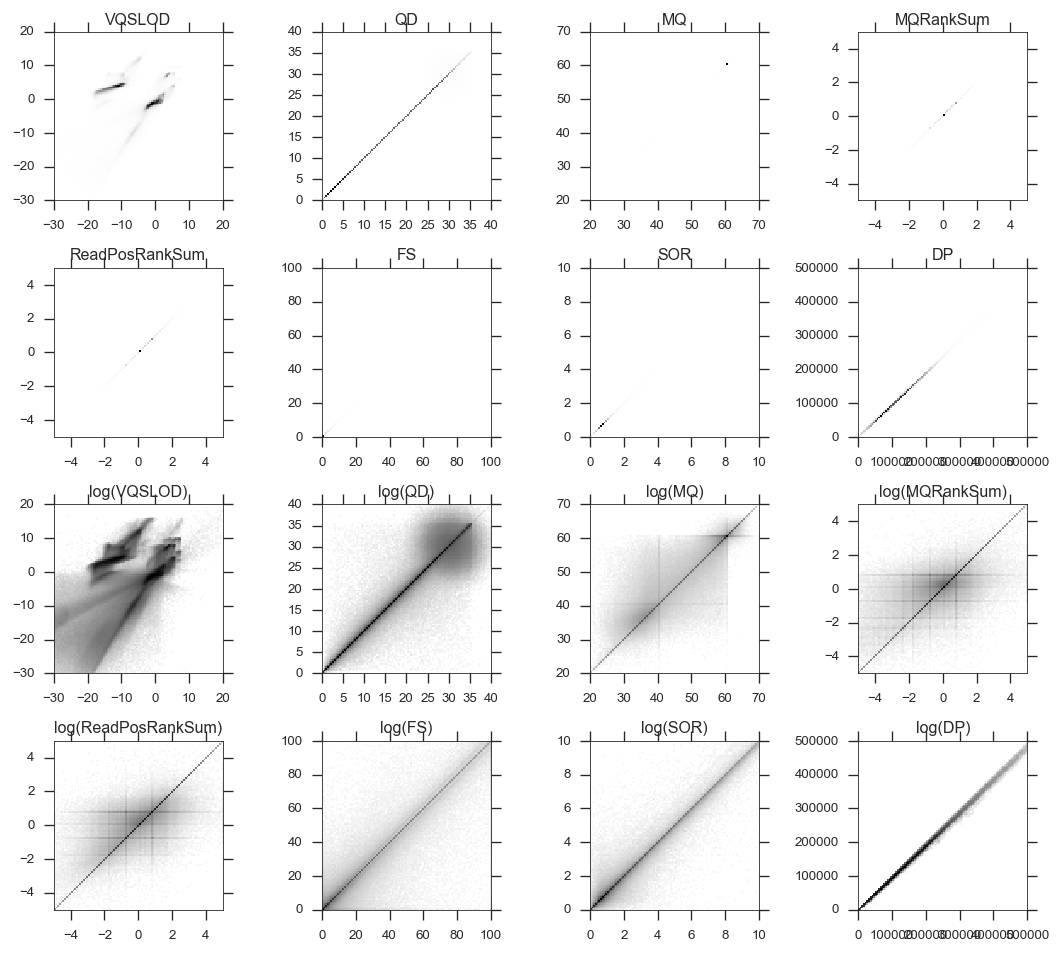

In [100]:
plot_callset_differences(xlims=xlims['wide'])

## All variants release 4 vs interim 5 zoomed

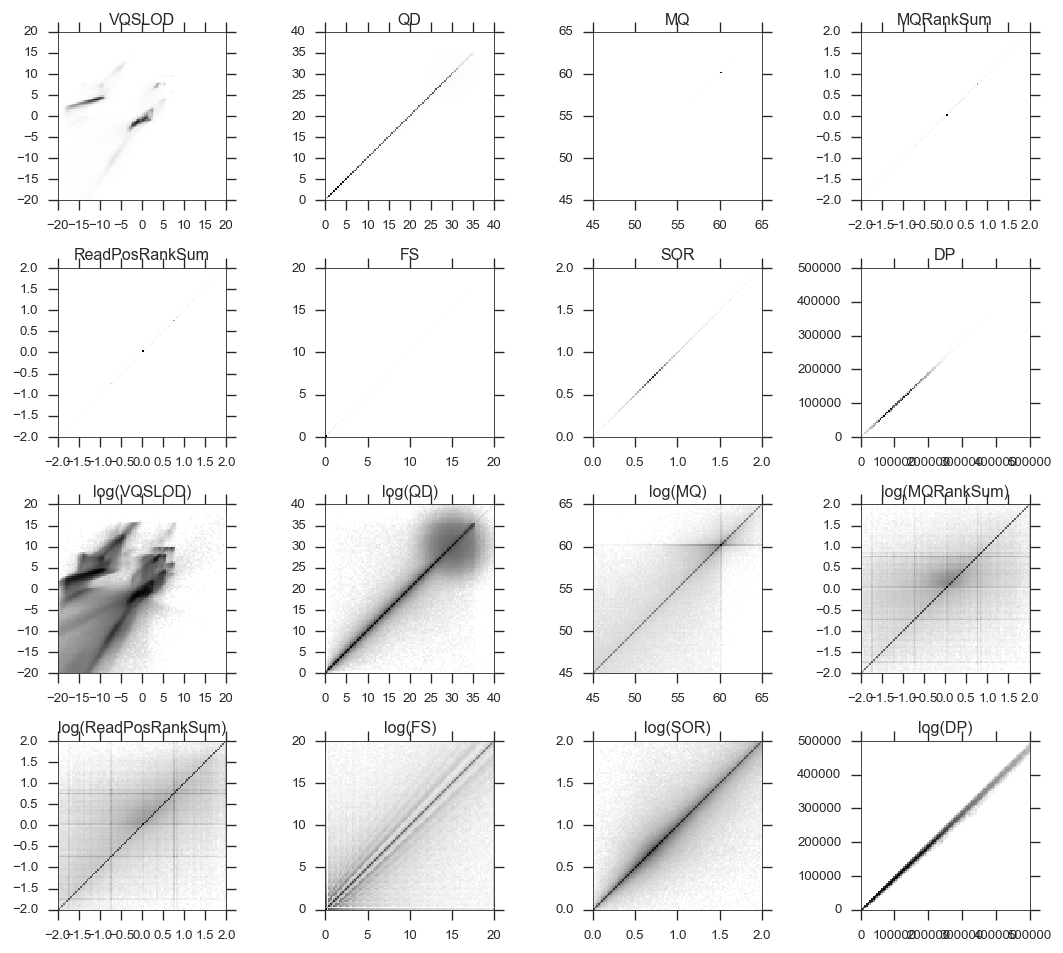

In [102]:
plot_callset_differences(xlims=xlims['narrow'])

## Training variants release 4 vs interim 5

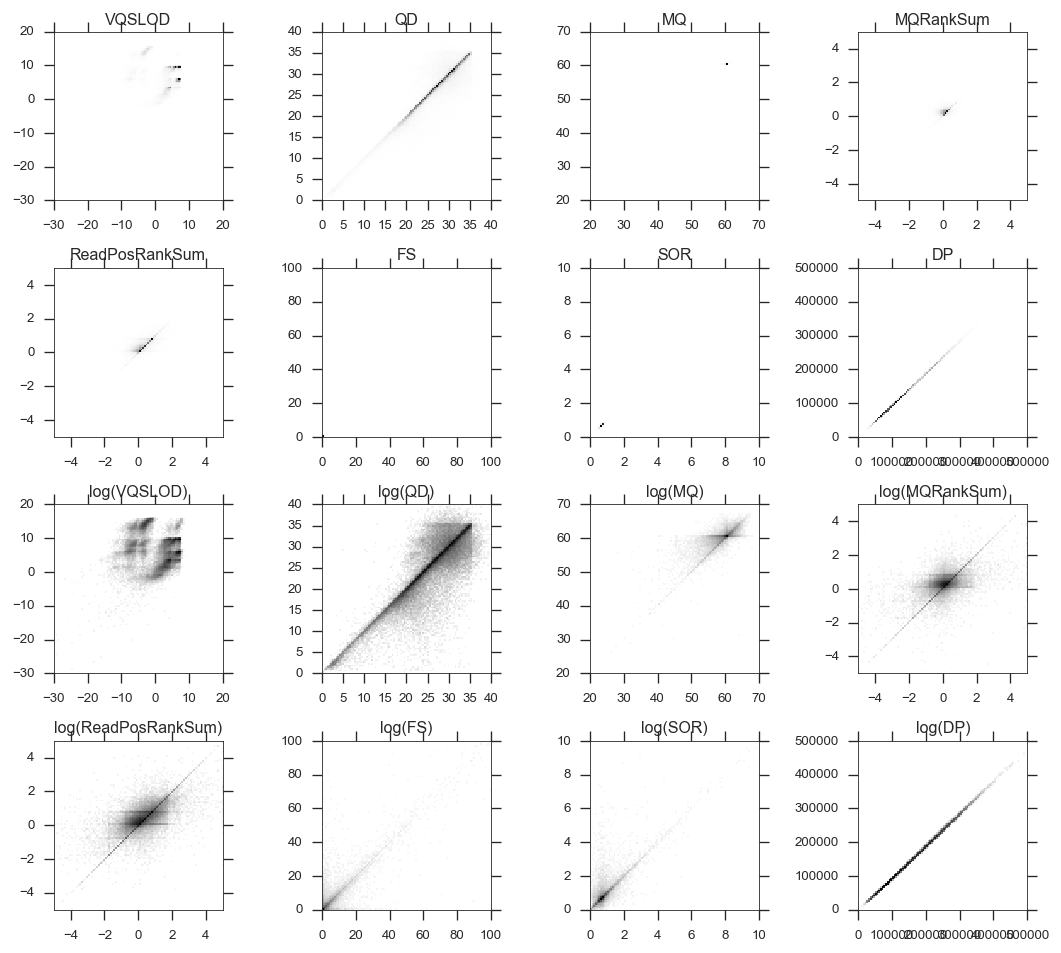

In [104]:
plot_callset_differences(
    v_old_selection=(r4_in_i5 & np.in1d(variants_release4[['CHROM', 'POS']], training_variants)),
    v_new_selection=(i5_in_r4 & np.in1d(variants_interim5[['CHROM', 'POS']], training_variants)),
    xlims=xlims['wide'] )

## Training variants release 4 vs interim 5 zoomed

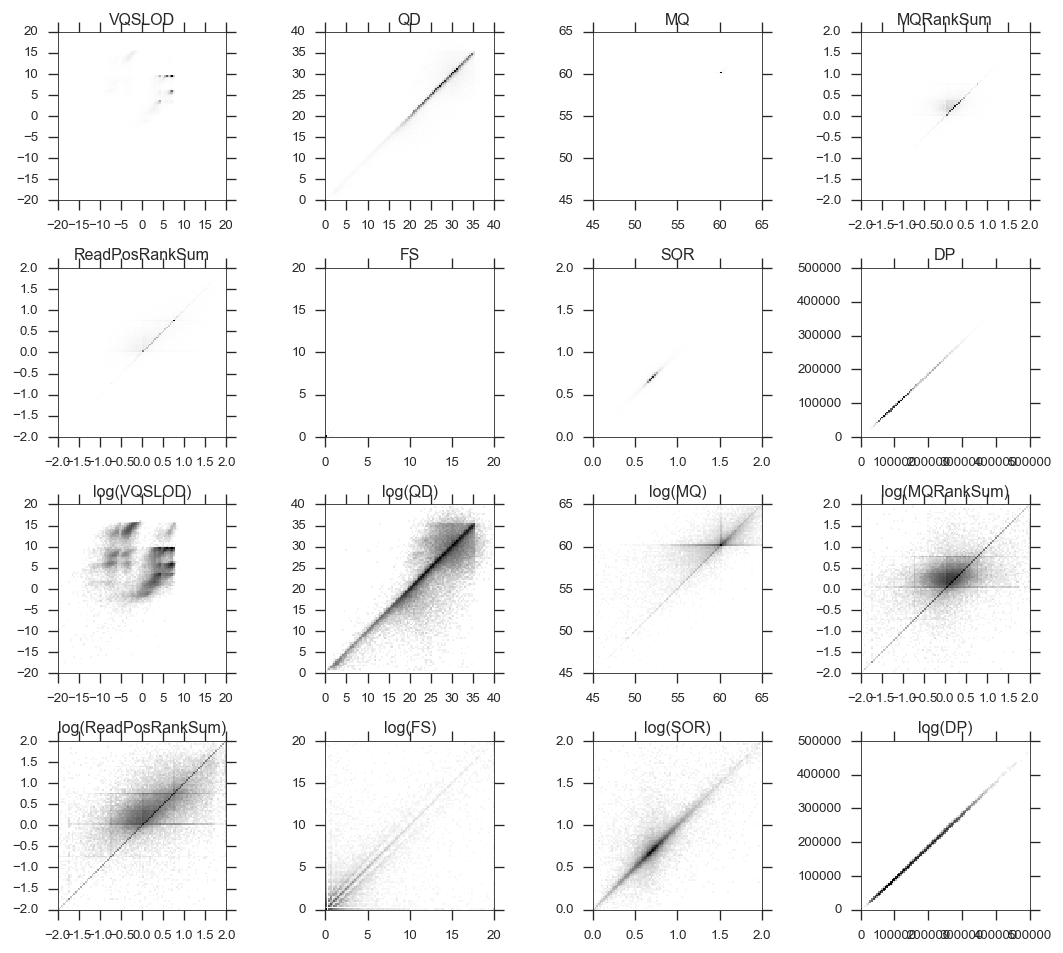

In [105]:
plot_callset_differences(
    v_old_selection=(r4_in_i5 & np.in1d(variants_release4[['CHROM', 'POS']], training_variants)),
    v_new_selection=(i5_in_r4 & np.in1d(variants_interim5[['CHROM', 'POS']], training_variants)),
    xlims=xlims['narrow'] )

## all SNPs

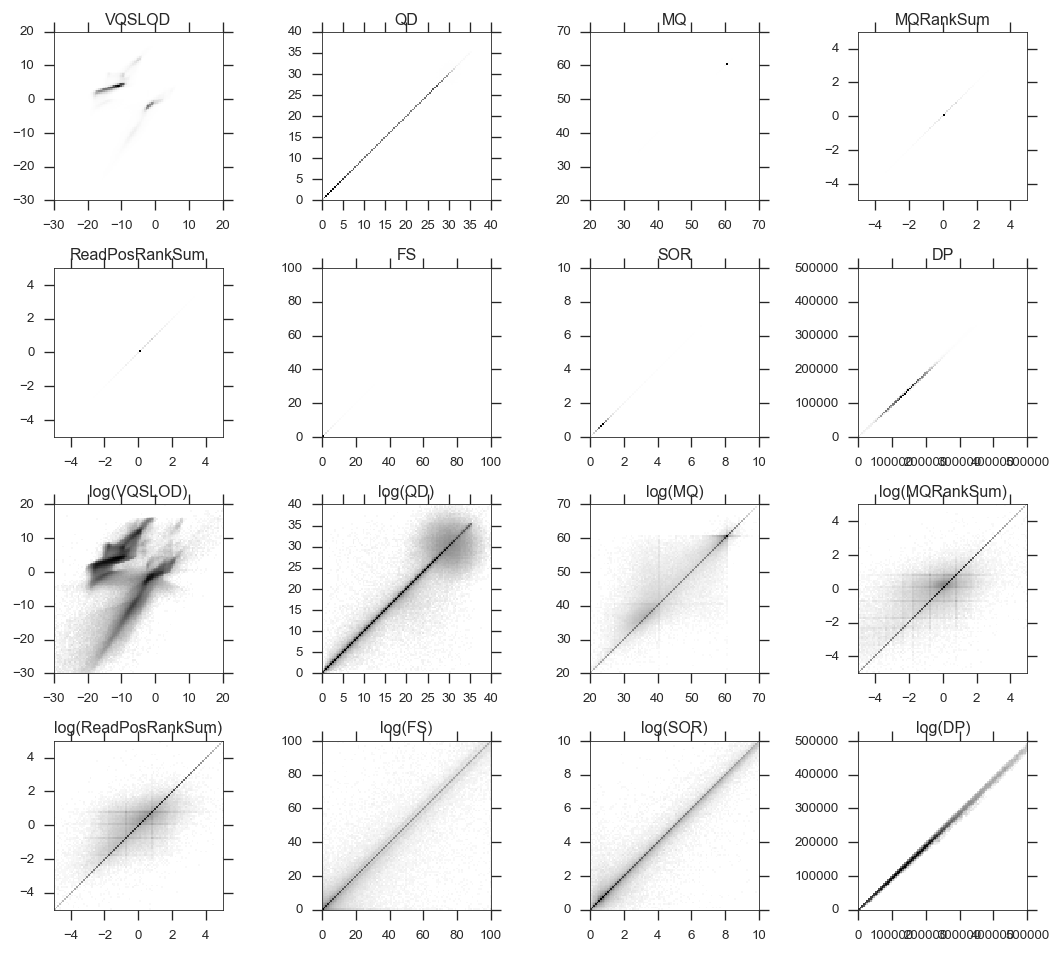

In [107]:
plot_callset_differences(
    v_old_selection=(snps_r4_in_i5),
    v_new_selection=(snps_i5_in_r4),
    xlims=xlims['wide'] )

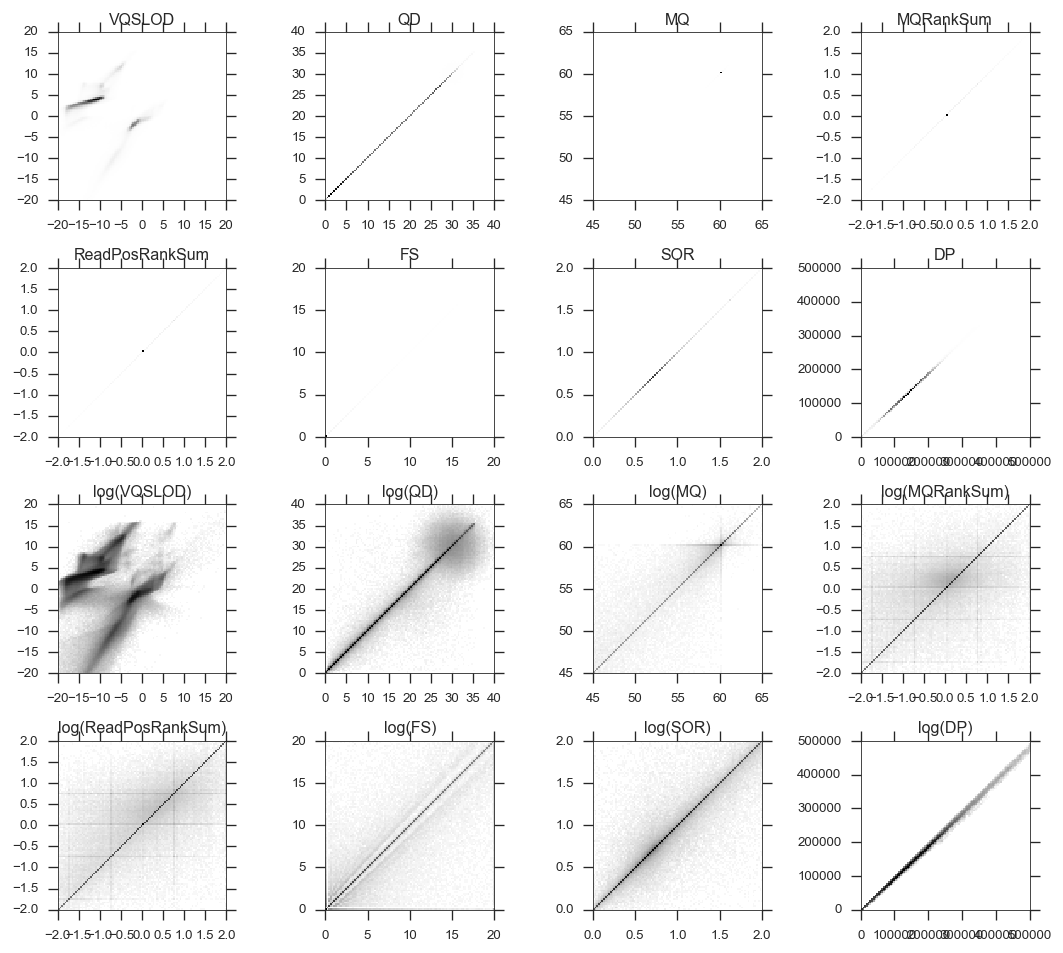

In [108]:
plot_callset_differences(
    v_old_selection=(snps_r4_in_i5),
    v_new_selection=(snps_i5_in_r4),
    xlims=xlims['narrow'] )

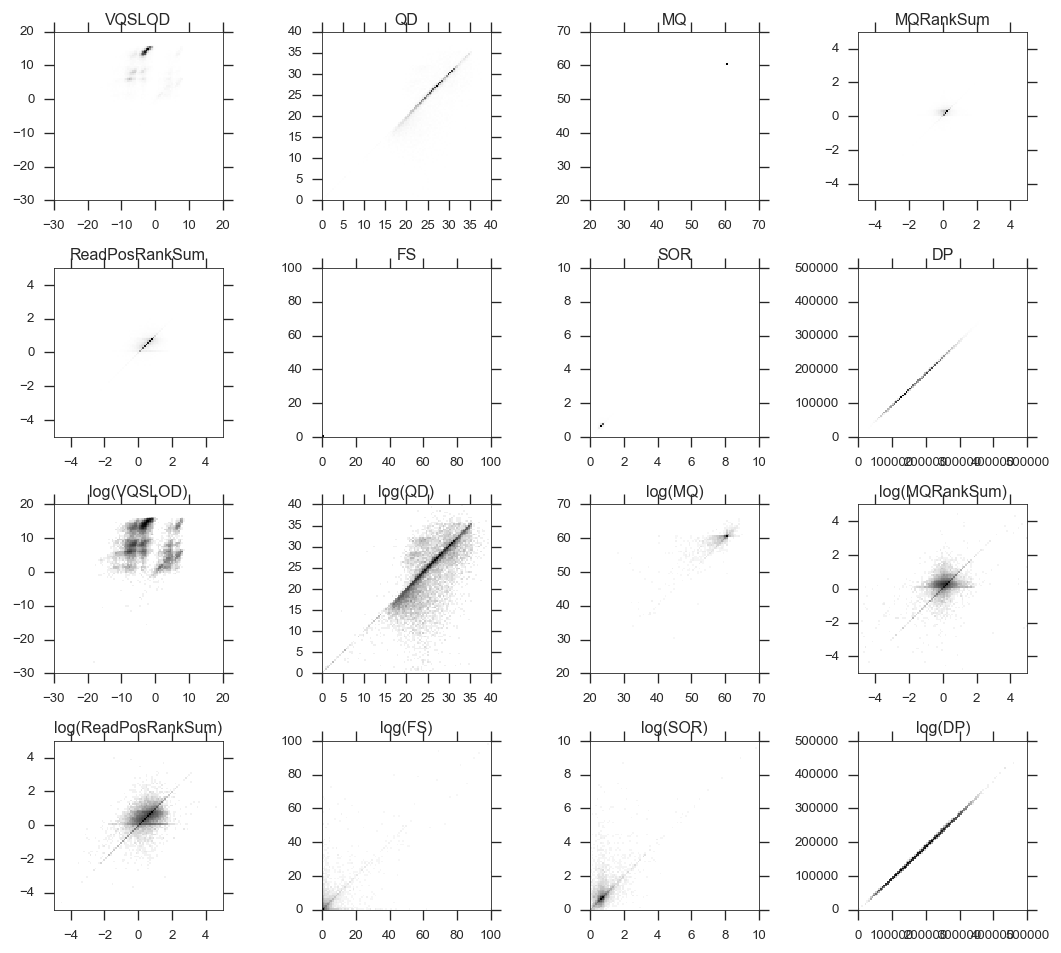

In [109]:
plot_callset_differences(
    v_old_selection=(snps_r4_in_i5 & np.in1d(variants_release4[['CHROM', 'POS']], training_variants)),
    v_new_selection=(snps_i5_in_r4 & np.in1d(variants_interim5[['CHROM', 'POS']], training_variants)),
    xlims=xlims['wide'] )

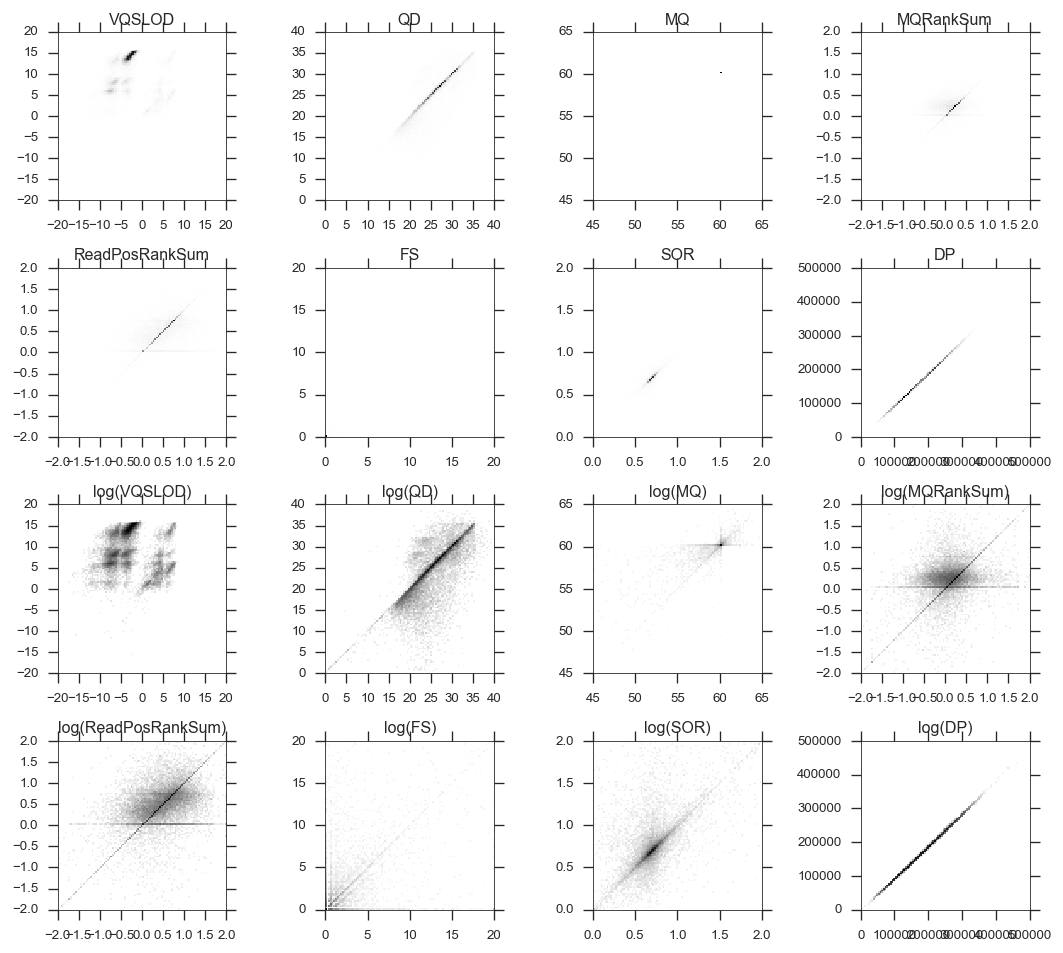

In [110]:
plot_callset_differences(
    v_old_selection=(snps_r4_in_i5 & np.in1d(variants_release4[['CHROM', 'POS']], training_variants)),
    v_new_selection=(snps_i5_in_r4 & np.in1d(variants_interim5[['CHROM', 'POS']], training_variants)),
    xlims=xlims['narrow'] )

In [41]:
def plot_callset_differences_nolog(
    variants_old=variants_release4, variants_new=variants_interim5, input_variables=input_variables,
    v_old_selection = r4_in_i5, v_new_selection = i5_in_r4,
    figsize=(9, 4), xlims=xlims['narrower']
):

    fig = plt.figure(figsize=figsize)

    for i, input_variable in enumerate(input_variables):
#         print(input_variable)
        v_old = variants_old[input_variable][v_old_selection]
        v_new = variants_new[input_variable][v_new_selection]

        if input_variable == 'DP':
            bins = np.linspace(xlims[input_variable]['release4'][0], xlims[input_variable]['release4'][1], 101)
        else:
            bins = np.linspace(xlims[input_variable][0], xlims[input_variable][1], 101)

        H, xedges, yedges = np.histogram2d(v_new, v_old, bins=(bins, bins))

        ax = fig.add_subplot(2, 4, i+1)
        ax.set_title(input_variable)
        im = plt.imshow(H, interpolation='nearest', origin='low',
                    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

#         ax = fig.add_subplot(4, 4, i+9)
#         ax.set_title("log(%s)" % input_variable)
#         im = plt.imshow(np.log(H+1), interpolation='nearest', origin='low',
#                     extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    fig.tight_layout()
    
    return(fig)


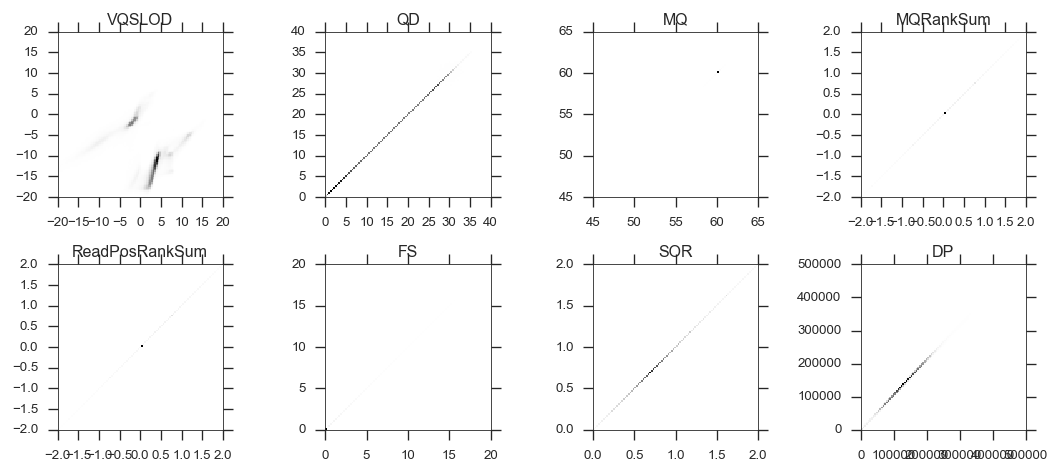

In [42]:
plot_callset_differences_nolog(
    v_old_selection=(snps_r4_in_i5),
    v_new_selection=(snps_i5_in_r4),
    xlims=xlims['narrow'] ).savefig("%s/input_variables_all_snps.pdf" % plot_dir)

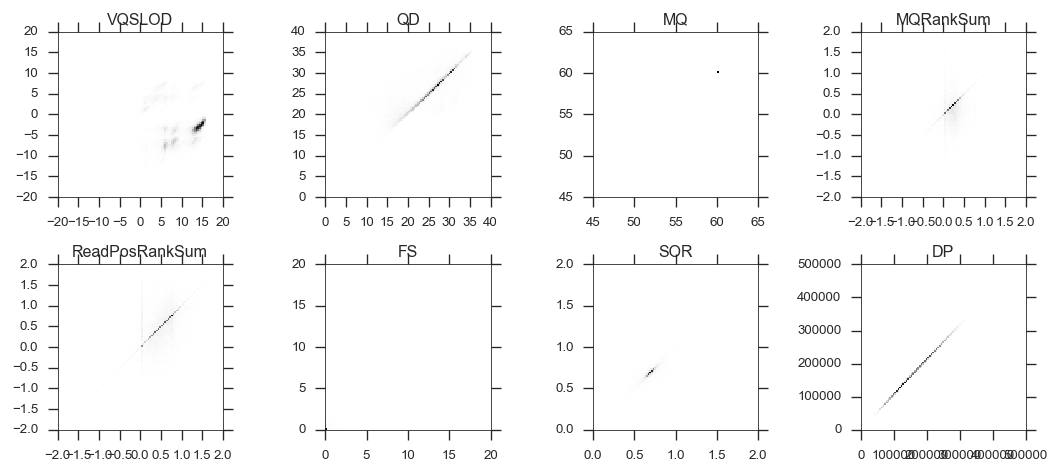

In [43]:
plot_callset_differences_nolog(
    v_old_selection=(snps_r4_in_i5 & np.in1d(variants_release4[['CHROM', 'POS']], training_variants)),
    v_new_selection=(snps_i5_in_r4 & np.in1d(variants_interim5[['CHROM', 'POS']], training_variants)),
    xlims=xlims['narrow'] ).savefig("%s/input_variables_training_snps.pdf" % plot_dir)

# Rerun VQSR

In [42]:
!GenomeAnalysisTK

##### ERROR ------------------------------------------------------------------------------------------
##### ERROR A USER ERROR has occurred (version 3.5-0-ge91472d): 
##### ERROR
##### ERROR This means that one or more arguments or inputs in your command are incorrect.
##### ERROR The error message below tells you what is the problem.
##### ERROR
##### ERROR If the problem is an invalid argument, please check the online documentation guide
##### ERROR (or rerun your command with --help) to view allowable command-line arguments for this tool.
##### ERROR
##### ERROR Visit our website and forum for extensive documentation and answers to 
##### ERROR commonly asked questions http://www.broadinstitute.org/gatk
##### ERROR
##### ERROR Please do NOT post this error to the GATK forum unless you have really tried to fix it yourself.
##### ERROR
##### ERROR MESSAGE: Argument with name '--analysis_type' (-T) is missing.
##### ERROR ---------------------------------------------------------------

In [64]:
VQSR_PRIOR=15
CROSSES_DIR='/data/plasmodium/pfalciparum/pf-crosses/data/public/1.0'
VQSR_ANNOTATIONS_SNP="-an QD -an MQ -an MQRankSum -an ReadPosRankSum -an FS -an SOR -an DP"
MAX_GAUSSIANS_SNP=8
recal_snp_fn = os.path.join(DATA_DIR, 'release4', 'vqsr', 'as_build', 'SNP.recal')
tranches_snp_fn = os.path.join(DATA_DIR, 'release4', 'vqsr', 'as_build', 'SNP.tranches')
unfiltered_vcf_fn = os.path.join(DATA_DIR, 'release4', 'vqsr', 'as_build', 'release4_WG_sites.unfiltered.vcf.gz')

if not os.path.exists(os.path.dirname(recal_snp_fn)):
    os.makedirs(os.path.dirname(recal_snp_fn))

if not os.path.exists(unfiltered_vcf_fn):
    !bcftools annotate --remove FILTER --output {unfiltered_vcf_fn} --output-type z {WG_VCF_FNS['release4']}
!bcftools index --tbi {unfiltered_vcf_fn}

!GenomeAnalysisTK \
    -T VariantRecalibrator \
    -R {GENOME_FN} \
    -input {unfiltered_vcf_fn} \
    -resource:7g8_gb4,known=false,training=true,truth=true,prior={VQSR_PRIOR} {CROSSES_DIR}/7g8_gb4.combined.final.vcf.gz \
    -resource:hb3_dd2,known=false,training=true,truth=true,prior={VQSR_PRIOR} {CROSSES_DIR}/hb3_dd2.combined.final.vcf.gz \
    -resource:3d7_hb3,known=false,training=true,truth=true,prior={VQSR_PRIOR} {CROSSES_DIR}/3d7_hb3.combined.final.vcf.gz \
    {VQSR_ANNOTATIONS_SNP} \
    --maxGaussians {MAX_GAUSSIANS_SNP} \
    -mode SNP \
    -recalFile {recal_snp_fn} \
    -tranchesFile {tranches_snp_fn}
#     2> /dev/null


INFO  09:25:54,078 HelpFormatter - -------------------------------------------------------------------------------- 
INFO  09:25:54,080 HelpFormatter - The Genome Analysis Toolkit (GATK) v3.5-0-ge91472d, Compiled 2016/01/14 14:23:38 
INFO  09:25:54,083 HelpFormatter - Copyright (c) 2010 The Broad Institute 
INFO  09:25:54,083 HelpFormatter - For support and documentation go to http://www.broadinstitute.org/gatk 
INFO  09:25:54,101 HelpFormatter - Program Args: -T VariantRecalibrator -R /lustre/scratch109/malaria/pf3k_methods/resources/Pfalciparum.genome.fasta -input /nfs/team112_internal/rp7/data/pf3k/release4/vqsr/as_build/release4_WG_sites.unfiltered.vcf.gz -resource:7g8_gb4,known=false,training=true,truth=true,prior=15 /data/plasmodium/pfalciparum/pf-crosses/data/public/1.0/7g8_gb4.combined.final.vcf.gz -resource:hb3_dd2,known=false,training=true,truth=true,prior=15 /data/plasmodium/pfalciparum/pf-crosses/data/public/1.0/hb3_dd2.combined.final.vcf.gz -resource:3d7_hb3,known=false,tr

In [77]:
VQSR_PRIOR=15
CROSSES_DIR='/data/plasmodium/pfalciparum/pf-crosses/data/public/1.0'
VQSR_ANNOTATIONS_SNP="-an QD -an MQ -an MQRankSum -an ReadPosRankSum -an FS -an SOR -an DP"
MAX_GAUSSIANS_SNP=8
recal_snp_fn = os.path.join(DATA_DIR, 'release4', 'vqsr', 'as_build_3_4', 'SNP.recal')
tranches_snp_fn = os.path.join(DATA_DIR, 'release4', 'vqsr', 'as_build_3_4', 'SNP.tranches')
unfiltered_vcf_fn = os.path.join(DATA_DIR, 'release4', 'vqsr', 'as_build_3_4', 'release4_WG_sites.unfiltered.vcf.gz')

if not os.path.exists(os.path.dirname(recal_snp_fn)):
    os.makedirs(os.path.dirname(recal_snp_fn))

if not os.path.exists(unfiltered_vcf_fn):
    !bcftools annotate --remove FILTER --output {unfiltered_vcf_fn} --output-type z {WG_VCF_FNS['release4']}
    !bcftools index --tbi {unfiltered_vcf_fn}

!java -jar /nfs/team112_internal/production/tools/bin/gatk/GenomeAnalysisTK-3.4-46/GenomeAnalysisTK.jar \
    -T VariantRecalibrator \
    -R {GENOME_FN} \
    -input {unfiltered_vcf_fn} \
    -resource:7g8_gb4,known=false,training=true,truth=true,prior={VQSR_PRIOR} {CROSSES_DIR}/7g8_gb4.combined.final.vcf.gz \
    -resource:hb3_dd2,known=false,training=true,truth=true,prior={VQSR_PRIOR} {CROSSES_DIR}/hb3_dd2.combined.final.vcf.gz \
    -resource:3d7_hb3,known=false,training=true,truth=true,prior={VQSR_PRIOR} {CROSSES_DIR}/3d7_hb3.combined.final.vcf.gz \
    {VQSR_ANNOTATIONS_SNP} \
    --maxGaussians {MAX_GAUSSIANS_SNP} \
    -mode SNP \
    -recalFile {recal_snp_fn} \
    -tranchesFile {tranches_snp_fn}
#     2> /dev/null


INFO  11:02:03,813 HelpFormatter - --------------------------------------------------------------------------------- 
INFO  11:02:03,819 HelpFormatter - The Genome Analysis Toolkit (GATK) v3.4-46-gbc02625, Compiled 2015/07/09 17:38:12 
INFO  11:02:03,819 HelpFormatter - Copyright (c) 2010 The Broad Institute 
INFO  11:02:03,819 HelpFormatter - For support and documentation go to http://www.broadinstitute.org/gatk 
INFO  11:02:03,823 HelpFormatter - Program Args: -T VariantRecalibrator -R /lustre/scratch109/malaria/pf3k_methods/resources/Pfalciparum.genome.fasta -input /nfs/team112_internal/rp7/data/pf3k/release4/vqsr/as_build_3_4/release4_WG_sites.unfiltered.vcf.gz -resource:7g8_gb4,known=false,training=true,truth=true,prior=15 /data/plasmodium/pfalciparum/pf-crosses/data/public/1.0/7g8_gb4.combined.final.vcf.gz -resource:hb3_dd2,known=false,training=true,truth=true,prior=15 /data/plasmodium/pfalciparum/pf-crosses/data/public/1.0/hb3_dd2.combined.final.vcf.gz -resource:3d7_hb3,known=fa

In [78]:
VQSR_PRIOR=15
CROSSES_DIR='/data/plasmodium/pfalciparum/pf-crosses/data/public/1.0'
VQSR_ANNOTATIONS_SNP="-an QD -an MQ -an MQRankSum -an ReadPosRankSum -an FS -an SOR -an DP"
MAX_GAUSSIANS_SNP=8
recal_snp_fn = os.path.join(DATA_DIR, 'interim5', 'vqsr', 'as_build_3_4', 'SNP.recal')
tranches_snp_fn = os.path.join(DATA_DIR, 'interim5', 'vqsr', 'as_build_3_4', 'SNP.tranches')
unfiltered_vcf_fn = os.path.join(DATA_DIR, 'interim5', 'vqsr', 'as_build_3_4', 'interim5_WG_sites.unfiltered.vcf.gz')

if not os.path.exists(os.path.dirname(recal_snp_fn)):
    os.makedirs(os.path.dirname(recal_snp_fn))

if not os.path.exists(unfiltered_vcf_fn):
    !bcftools annotate --remove FILTER --output {unfiltered_vcf_fn} --output-type z {WG_VCF_FNS['interim5']}
    !bcftools index --tbi {unfiltered_vcf_fn}

!java -jar /nfs/team112_internal/production/tools/bin/gatk/GenomeAnalysisTK-3.4-46/GenomeAnalysisTK.jar \
    -T VariantRecalibrator \
    -R {GENOME_FN} \
    -input {unfiltered_vcf_fn} \
    -resource:7g8_gb4,known=false,training=true,truth=true,prior={VQSR_PRIOR} {CROSSES_DIR}/7g8_gb4.combined.final.vcf.gz \
    -resource:hb3_dd2,known=false,training=true,truth=true,prior={VQSR_PRIOR} {CROSSES_DIR}/hb3_dd2.combined.final.vcf.gz \
    -resource:3d7_hb3,known=false,training=true,truth=true,prior={VQSR_PRIOR} {CROSSES_DIR}/3d7_hb3.combined.final.vcf.gz \
    {VQSR_ANNOTATIONS_SNP} \
    --maxGaussians {MAX_GAUSSIANS_SNP} \
    -mode SNP \
    -recalFile {recal_snp_fn} \
    -tranchesFile {tranches_snp_fn}
#     2> /dev/null


INFO  11:40:24,957 HelpFormatter - --------------------------------------------------------------------------------- 
INFO  11:40:24,962 HelpFormatter - The Genome Analysis Toolkit (GATK) v3.4-46-gbc02625, Compiled 2015/07/09 17:38:12 
INFO  11:40:24,962 HelpFormatter - Copyright (c) 2010 The Broad Institute 
INFO  11:40:24,962 HelpFormatter - For support and documentation go to http://www.broadinstitute.org/gatk 
INFO  11:40:24,965 HelpFormatter - Program Args: -T VariantRecalibrator -R /lustre/scratch109/malaria/pf3k_methods/resources/Pfalciparum.genome.fasta -input /nfs/team112_internal/rp7/data/pf3k/interim5/vqsr/as_build_3_4/interim5_WG_sites.unfiltered.vcf.gz -resource:7g8_gb4,known=false,training=true,truth=true,prior=15 /data/plasmodium/pfalciparum/pf-crosses/data/public/1.0/7g8_gb4.combined.final.vcf.gz -resource:hb3_dd2,known=false,training=true,truth=true,prior=15 /data/plasmodium/pfalciparum/pf-crosses/data/public/1.0/hb3_dd2.combined.final.vcf.gz -resource:3d7_hb3,known=fa

In [51]:
VQSR_PRIOR=15
CROSSES_DIR='/data/plasmodium/pfalciparum/pf-crosses/data/public/1.0'
VQSR_ANNOTATIONS_SNP="-an QD -an MQ -an MQRankSum -an ReadPosRankSum -an FS -an SOR -an DP"
MAX_GAUSSIANS_SNP=8
recal_snp_fn = os.path.join(DATA_DIR, 'release4', 'vqsr', 'as_build_replicate', 'SNP.recal')
tranches_snp_fn = os.path.join(DATA_DIR, 'release4', 'vqsr', 'as_build_replicate', 'SNP.tranches')

if not os.path.exists(os.path.dirname(recal_snp_fn)):
    os.makedirs(os.path.dirname(recal_snp_fn))

!GenomeAnalysisTK \
    -T VariantRecalibrator \
    -R {GENOME_FN} \
    -input {WG_VCF_FNS['release4']} \
    -resource:7g8_gb4,known=false,training=true,truth=true,prior={VQSR_PRIOR} {CROSSES_DIR}/7g8_gb4.combined.final.vcf.gz \
    -resource:hb3_dd2,known=false,training=true,truth=true,prior={VQSR_PRIOR} {CROSSES_DIR}/hb3_dd2.combined.final.vcf.gz \
    -resource:3d7_hb3,known=false,training=true,truth=true,prior={VQSR_PRIOR} {CROSSES_DIR}/3d7_hb3.combined.final.vcf.gz \
    {VQSR_ANNOTATIONS_SNP} \
    --maxGaussians {MAX_GAUSSIANS_SNP} \
    -mode SNP \
    -recalFile {recal_snp_fn} \
    -tranchesFile {tranches_snp_fn}
#     2> /dev/null


INFO  18:03:55,869 HelpFormatter - -------------------------------------------------------------------------------- 
INFO  18:03:55,871 HelpFormatter - The Genome Analysis Toolkit (GATK) v3.5-0-ge91472d, Compiled 2016/01/14 14:23:38 
INFO  18:03:55,874 HelpFormatter - Copyright (c) 2010 The Broad Institute 
INFO  18:03:55,874 HelpFormatter - For support and documentation go to http://www.broadinstitute.org/gatk 
INFO  18:03:55,887 HelpFormatter - Program Args: -T VariantRecalibrator -R /lustre/scratch109/malaria/pf3k_methods/resources/Pfalciparum.genome.fasta -input /nfs/team112_internal/rp7/data/pf3k/release4/sites/sites_only_vcfs/release4_WG_sites.vcf.gz -resource:7g8_gb4,known=false,training=true,truth=true,prior=15 /data/plasmodium/pfalciparum/pf-crosses/data/public/1.0/7g8_gb4.combined.final.vcf.gz -resource:hb3_dd2,known=false,training=true,truth=true,prior=15 /data/plasmodium/pfalciparum/pf-crosses/data/public/1.0/hb3_dd2.combined.final.vcf.gz -resource:3d7_hb3,known=false,train

In [61]:
WG_VCF_FNS['release4']

'/nfs/team112_internal/rp7/data/pf3k/release4/sites/sites_only_vcfs/release4_WG_sites.vcf.gz'

In [ ]:
!bcftools query -f '%CHROM  %POS  %REF  %ALT  %VQSLOD\n' --include TYPE="snp" /nfs/team112_internal/rp7/data/pf3k/release4/sites/sites_only_vcfs/release4_WG_sites.vcf.gz | less -S


In [62]:
recal_snp_fn

'/nfs/team112_internal/rp7/data/pf3k/release4/vqsr/as_build_replicate/SNP.recal'

In [58]:
# Install GATK version 3.4
# Got SHA from https://github.com/broadgsa/gatk-protected/releases/tag/3.4
!SHA=f19618653a0d23baaf147efe7f14aeb4eeb0cbb8
!git clone https://github.com/broadgsa/gatk-protected.git /opt/gatk_3_4 && \
    cd /opt/gatk_3_4 && \
    git reset --hard $SHA && \
    sed -i 's/import oracle.jrockit.jfr.StringConstantPool/\/\/import oracle.jrockit.jfr.StringConstantPool/g' ./public/gatk-tools-public/src/main/java/org/broadinstitute/gatk/tools/walkers/varianteval/VariantEval.java && \
    mvn verify -P\!queue && \
    bash -c 'echo -e "#!/bin/bash\njava -jar '/opt/gatk_3_4'/target/GenomeAnalysisTK.jar  \$@" > '/opt'/GenomeAnalysisTK_3_4' && \
    chmod +x /opt/GenomeAnalysisTK_3_4
!PATH=/usr/lib/jvm/java-7-openjdk-amd64/bin:$PATH

# !DST=/home/biodocker/bin
# FOLDER=gatk
# git clone https://github.com/broadgsa/gatk-protected.git $DST/$FOLDER && \
#     cd $DST/$FOLDER && \
#     sed -i 's/import oracle.jrockit.jfr.StringConstantPool/\/\/import oracle.jrockit.jfr.StringConstantPool/g' ./public/gatk-tools-public/src/main/java/org/broadinstitute/gatk/tools/walkers/varianteval/VariantEval.java && \
#     mvn verify -P\!queue && \
#     bash -c 'echo -e "#!/bin/bash\njava -jar '$DST/$FOLDER'/target/GenomeAnalysisTK.jar  \$@" > '$DST'/GenomeAnalysisTK' && \
#     chmod +x $DST/GenomeAnalysisTK
# PATH=/usr/lib/jvm/java-7-openjdk-amd64/bin:$PATH



Cloning into '/opt/gatk_3_4'...
remote: Counting objects: 196506, done.
remote: Total 196506 (delta 0), reused 0 (delta 0), pack-reused 196506
Receiving objects: 100% (196506/196506), 245.26 MiB | 1.26 MiB/s, done.
Resolving deltas: 100% (107389/107389), done.
Checking connectivity... done.
HEAD is now at e91472d Update pom versions for the 3.5 release
[INFO] Scanning for projects...
[INFO] ------------------------------------------------------------------------
[INFO] Reactor Build Order:
[INFO] 
[INFO] GATK Root
[INFO] GATK Aggregator
[INFO] GATK GSALib
[INFO] GATK Utils
[INFO] GATK Engine
[INFO] GATK Tools Public
[INFO] External Example
[INFO] GATK Aggregator Public
[INFO] GATK Tools Protected
[INFO] GATK Package Distribution
[INFO] GATK Aggregator Protected
[INFO]                                                                         
[INFO] ------------------------------------------------------------------------
[INFO] Building GATK Root 3.5
[INFO] -------------------------------

In [58]:
# Install GATK version 3.4
# Got SHA from https://github.com/broadgsa/gatk-protected/releases/tag/3.4
!SHA=gbc02625
!git clone https://github.com/broadgsa/gatk-protected.git /opt/gatk_3_4_46 && \
    cd /opt/gatk_3_4_46 && \
    git reset --hard $SHA && \
    sed -i 's/import oracle.jrockit.jfr.StringConstantPool/\/\/import oracle.jrockit.jfr.StringConstantPool/g' ./public/gatk-tools-public/src/main/java/org/broadinstitute/gatk/tools/walkers/varianteval/VariantEval.java && \
    mvn verify -P\!queue && \
    bash -c 'echo -e "#!/bin/bash\njava -jar '/opt/gatk_3_4_46'/target/GenomeAnalysisTK.jar  \$@" > '/opt'/GenomeAnalysisTK_3_4_46' && \
    chmod +x /opt/GenomeAnalysisTK_3_4_46
!PATH=/usr/lib/jvm/java-7-openjdk-amd64/bin:$PATH

# !DST=/home/biodocker/bin
# FOLDER=gatk
# git clone https://github.com/broadgsa/gatk-protected.git $DST/$FOLDER && \
#     cd $DST/$FOLDER && \
#     sed -i 's/import oracle.jrockit.jfr.StringConstantPool/\/\/import oracle.jrockit.jfr.StringConstantPool/g' ./public/gatk-tools-public/src/main/java/org/broadinstitute/gatk/tools/walkers/varianteval/VariantEval.java && \
#     mvn verify -P\!queue && \
#     bash -c 'echo -e "#!/bin/bash\njava -jar '$DST/$FOLDER'/target/GenomeAnalysisTK.jar  \$@" > '$DST'/GenomeAnalysisTK' && \
#     chmod +x $DST/GenomeAnalysisTK
# PATH=/usr/lib/jvm/java-7-openjdk-amd64/bin:$PATH



Cloning into '/opt/gatk_3_4'...
remote: Counting objects: 196506, done.
remote: Total 196506 (delta 0), reused 0 (delta 0), pack-reused 196506
Receiving objects: 100% (196506/196506), 245.26 MiB | 1.26 MiB/s, done.
Resolving deltas: 100% (107389/107389), done.
Checking connectivity... done.
HEAD is now at e91472d Update pom versions for the 3.5 release
[INFO] Scanning for projects...
[INFO] ------------------------------------------------------------------------
[INFO] Reactor Build Order:
[INFO] 
[INFO] GATK Root
[INFO] GATK Aggregator
[INFO] GATK GSALib
[INFO] GATK Utils
[INFO] GATK Engine
[INFO] GATK Tools Public
[INFO] External Example
[INFO] GATK Aggregator Public
[INFO] GATK Tools Protected
[INFO] GATK Package Distribution
[INFO] GATK Aggregator Protected
[INFO]                                                                         
[INFO] ------------------------------------------------------------------------
[INFO] Building GATK Root 3.5
[INFO] -------------------------------

In [60]:
# !chmod +x /opt/GenomeAnalysisTK_3_4
!GenomeAnalysisTK_3_4

##### ERROR ------------------------------------------------------------------------------------------
##### ERROR A USER ERROR has occurred (version 3.4-0-gf196186): 
##### ERROR
##### ERROR This means that one or more arguments or inputs in your command are incorrect.
##### ERROR The error message below tells you what is the problem.
##### ERROR
##### ERROR If the problem is an invalid argument, please check the online documentation guide
##### ERROR (or rerun your command with --help) to view allowable command-line arguments for this tool.
##### ERROR
##### ERROR Visit our website and forum for extensive documentation and answers to 
##### ERROR commonly asked questions http://www.broadinstitute.org/gatk
##### ERROR
##### ERROR Please do NOT post this error to the GATK forum unless you have really tried to fix it yourself.
##### ERROR
##### ERROR MESSAGE: Argument with name '--analysis_type' (-T) is missing.
##### ERROR ---------------------------------------------------------------

In [47]:
!ls -altr {WG_VCF_FNS['release4']}

-rw-r--r-- 1 1000 staff 351766404 Jan 16 10:08 /nfs/team112_internal/rp7/data/pf3k/release4/sites/sites_only_vcfs/release4_WG_sites.vcf.gz


# Conclusions
- MQRankSum, ReadPosRankSum and FS all have large proportions of zero values
- In release4 about 7% of training SNPs had zero in RankSum, but in interim5 only ~1%
- Zero values general in both RankSum variables, but sometimes just one. Less correlation for FS=0.0
- VQSLOD scores generally clustered (multiple modes)
- MQ has two modes, RankSum variables have spikes other than at 0.0
- TODO correlations between inputs and VQSLOD
- TODO correlations between all inputs (7x7 grid)
- Variants with MQRankSum, ReadPosRankSum or FS of zero generally have higher VQSLOD
- Most training variants in release4 have VQSLOD > 0, but most in interim5 < 0
- Majority of indels pass in interim 5 but majority of SNPs fail. We see the opposite in release4
- There are a lot fewer SNPs with RankSum varibles = 0 in training set in interim5 than in release4
- 4e-4 SNPs in release4 but not interim5. 2e-3 SNPs in interim5 but not release4 - very high overlap
- Input variables generally well correlated between release4 and interim5
- Correlations somewhat lower amongst training variants, especially for RankSum variables
- VQSLOD scores have very strange correlation structure between releases. Negative but highly clustered
- When rerunning with the same GATK version, VQSR appears to give identical results, so not a pipeline bug